In [3]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria clinical

In [4]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 12 AND codclassificacao = 229"
       )
tweets = query(cmd)
print(len(tweets))

40214


In [5]:
print(tweets[:20])

[('Are you considering dental Implants, and have questions about the procedure?  Well this informative video may... https://t.co/woRCdat9UK',), ('I added a video to a @YouTube playlist https://t.co/fitcIJ3ZaK Cosmetic Dentist in Charleston SC - Same Day Dental Implants Cosmetic',), ('Link Between Root Canals &amp; Cancer? https://t.co/6X2w7eOLjA We offer truly affordable dental implants, starting at … https://t.co/Rbd6PvAIJc',), ('ENTER TO WIN 1 week in Cancun + Dental Implant! https://t.co/6FZKf8szYS #cancun #dentalimplant #dentist #dental https://t.co/Gk8PRIwTdZ',), ('Check out new work on my @Behance portfolio: "Dental Implants in Conjunction with Sinus Lift" https://t.co/7LoQAB0uor',), ('What’s Involved In A Dental Implant Procedure?  We breakdown the process and timeline for a #DentalImplant - https://t.co/MpPNhcVAJe',), ('ENTER TO WIN 1 week in Cancun + Dental Implant! https://t.co/9MWCqLUMgL #dentistry #mexico https://t.co/2aFWik8okI',), ('Why choose to place dental implants? Gr

# Pré-processamento

In [6]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [7]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

40214


In [8]:
for d in doc_complete[:20]:
    print(d)

are you considering dental implants and have questions about the procedure well this informative video may 
i added a video to a playlist 
link between root canals cancer 
enter to win week in cancun dental implant 
check out new work on my portfolio dental implants in conjunction with sinus lift 
what s involved in a dental implant procedure we breakdown the process and timeline for a dentalimplant 
enter to win week in cancun dental implant 
why choose to place dental implants great infographic at 
avicennas enter to win week in cancun dental implant 
quitting smoking decreases your risk of implant failure if you re considering a dental implant as a replaceme 
the advantages of dental implants key largo 
reasons why you should not be nervous about dental implants 
rt reasons why you should not be nervous about dental implants 
rt limited evidence suggests higher risk of dental implant failures in smokers than in nonsmokers 
whats involved in getting a dental implant dental implants a

In [9]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


16085.6
('teeth', 7895)
('installed', 4874)
('tooth', 3471)
('grow', 2969)
('natural', 2928)
('weeks', 2781)
('goodbye', 2721)
('learn', 2261)
('bone', 1947)
('benefits', 1838)
('discovery', 1725)
('care', 1590)
('video', 1586)
('revolutionary', 1506)
('option', 1482)
('missing', 1471)
('look', 1433)
('like', 1419)
('smile', 1369)
('know', 1290)
('health', 1230)
('best', 1172)
('surgery', 1169)
('added', 1152)
('right', 1132)
('replace', 1120)
('playlist', 1108)
('feel', 1090)
('procedure', 1088)
('patients', 1085)


In [10]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['considering', 'questions', 'procedure', 'well', 'informative', 'video']
['added', 'video', 'playlist']
['link', 'root', 'canals', 'cancer']
['enter', 'week', 'cancun']
['check', 'work', 'portfolio', 'conjunction', 'sinus', 'lift']
['involved', 'procedure', 'breakdown', 'process', 'timeline', 'dentalimplant']
['enter', 'week', 'cancun']
['choose', 'place', 'great', 'infographic']
['avicennas', 'enter', 'week', 'cancun']
['quitting', 'smoking', 'decreases', 'risk', 'failure', 'considering', 'replaceme']
['advantages', 'largo']
['reasons', 'nervous']
['reasons', 'nervous']
['limited', 'evidence', 'suggests', 'higher', 'risk', 'failures', 'smokers', 'nonsmokers']
['whats', 'involved', 'getting', 'increasingly', 'popular', 'replace']
['prosthetics', 'carl', 'misch']
['check', 'work', 'portfolio', 'taylor', 'gold', 'coast']
['watch', 'taylor', 'gold', 'coast']
['watch', 'first', 'getting']
['looks', 'added', 'health', 'benefits', 'boost']
40214


# Topic Modeling

In [11]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [12]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [13]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [14]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [15]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [16]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [17]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [18]:
dtm

<40214x9360 sparse matrix of type '<class 'numpy.int32'>'
	with 187294 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [19]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

ks

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]

In [20]:
eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 10
INFO:lda:n_words: 190550
INFO:lda:n_topics: 20
INFO:lda:n_documents: 40214
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 30
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 40
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_iter: 2000
INFO:lda:n_words: 190550
INFO:lda:n_topics: 50
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 60
INFO:lda:n_documents: 40214
INFO:lda:n_topics: 80
INFO:lda:n_documents: 40214
INFO:lda:n_topic

INFO:lda:<20> log likelihood: -1268199
INFO:lda:<40> log likelihood: -1210665
INFO:lda:<70> log likelihood: -1229860
INFO:lda:<30> log likelihood: -1227193
INFO:lda:<10> log likelihood: -1388746
INFO:lda:<80> log likelihood: -1226989
INFO:lda:<20> log likelihood: -1262096
INFO:lda:<50> log likelihood: -1205038
INFO:lda:<20> log likelihood: -1271164
INFO:lda:<90> log likelihood: -1224939
INFO:lda:<40> log likelihood: -1212005
INFO:lda:<30> log likelihood: -1228172
INFO:lda:<10> log likelihood: -1392555
INFO:lda:<10> log likelihood: -1399681
INFO:lda:<60> log likelihood: -1203018
INFO:lda:<100> log likelihood: -1223550
INFO:lda:<110> log likelihood: -1221634
INFO:lda:<20> log likelihood: -1266338
INFO:lda:<50> log likelihood: -1204426
INFO:lda:<70> log likelihood: -1201103
INFO:lda:<30> log likelihood: -1220253
INFO:lda:<120> log likelihood: -1220329
INFO:lda:<40> log likelihood: -1209174
INFO:lda:<20> log likelihood: -1271981
INFO:lda:<130> log likelihood: -1220108
INFO:lda:<10> log lik

INFO:lda:<620> log likelihood: -1207697
INFO:lda:<260> log likelihood: -1179628
INFO:lda:<40> log likelihood: -1220991
INFO:lda:<370> log likelihood: -1185083
INFO:lda:<200> log likelihood: -1164128
INFO:lda:<630> log likelihood: -1207557
INFO:lda:<110> log likelihood: -1157090
INFO:lda:<640> log likelihood: -1207815
INFO:lda:<160> log likelihood: -1158248
INFO:lda:<380> log likelihood: -1185305
INFO:lda:<270> log likelihood: -1178839
INFO:lda:<100> log likelihood: -1160567
INFO:lda:<650> log likelihood: -1207557
INFO:lda:<140> log likelihood: -1157036
INFO:lda:<390> log likelihood: -1184951
INFO:lda:<660> log likelihood: -1207822
INFO:lda:<210> log likelihood: -1164334
INFO:lda:<90> log likelihood: -1164091
INFO:lda:<280> log likelihood: -1178744
INFO:lda:<670> log likelihood: -1207064
INFO:lda:<400> log likelihood: -1184965
INFO:lda:<80> log likelihood: -1169110
INFO:lda:<170> log likelihood: -1157985
INFO:lda:<680> log likelihood: -1208057
INFO:lda:<120> log likelihood: -1156347
INF

INFO:lda:<490> log likelihood: -1173672
INFO:lda:<1160> log likelihood: -1207535
INFO:lda:<140> log likelihood: -1150180
INFO:lda:<160> log likelihood: -1149576
INFO:lda:<700> log likelihood: -1183066
INFO:lda:<1170> log likelihood: -1206066
INFO:lda:<120> log likelihood: -1153817
INFO:lda:<1180> log likelihood: -1206600
INFO:lda:<250> log likelihood: -1150143
INFO:lda:<380> log likelihood: -1160155
INFO:lda:<210> log likelihood: -1146483
INFO:lda:<300> log likelihood: -1152358
INFO:lda:<500> log likelihood: -1172958
INFO:lda:<710> log likelihood: -1182473
INFO:lda:<1190> log likelihood: -1206729
INFO:lda:<1200> log likelihood: -1207229
INFO:lda:<720> log likelihood: -1182877
INFO:lda:<510> log likelihood: -1172946
INFO:lda:<100> log likelihood: -1159996
INFO:lda:<1210> log likelihood: -1206865
INFO:lda:<390> log likelihood: -1159299
INFO:lda:<190> log likelihood: -1146183
INFO:lda:<1220> log likelihood: -1206821
INFO:lda:<730> log likelihood: -1183454
INFO:lda:<310> log likelihood: -1

INFO:lda:<1700> log likelihood: -1206316
INFO:lda:<720> log likelihood: -1168773
INFO:lda:<1010> log likelihood: -1182113
INFO:lda:<1710> log likelihood: -1206041
INFO:lda:<1720> log likelihood: -1206083
INFO:lda:<550> log likelihood: -1159405
INFO:lda:<1020> log likelihood: -1181464
INFO:lda:<360> log likelihood: -1147757
INFO:lda:<110> log likelihood: -1162738
INFO:lda:<1730> log likelihood: -1206089
INFO:lda:<730> log likelihood: -1169066
INFO:lda:<440> log likelihood: -1150110
INFO:lda:<270> log likelihood: -1143511
INFO:lda:<1030> log likelihood: -1181826
INFO:lda:<310> log likelihood: -1141617
INFO:lda:<1740> log likelihood: -1206114
INFO:lda:<1750> log likelihood: -1206596
INFO:lda:<560> log likelihood: -1157972
INFO:lda:<210> log likelihood: -1142320
INFO:lda:<240> log likelihood: -1143734
INFO:lda:<740> log likelihood: -1168653
INFO:lda:<1040> log likelihood: -1182456
INFO:lda:<1760> log likelihood: -1206377
INFO:lda:<1770> log likelihood: -1206205
INFO:lda:<1050> log likeliho

INFO:lda:<980> log likelihood: -1167420
INFO:lda:<740> log likelihood: -1158376
INFO:lda:<360> log likelihood: -1140082
INFO:lda:<280> log likelihood: -1136811
INFO:lda:<130> log likelihood: -1162764
INFO:lda:<1380> log likelihood: -1182138
INFO:lda:<590> log likelihood: -1149728
INFO:lda:<320> log likelihood: -1140700
INFO:lda:<990> log likelihood: -1167975
INFO:lda:<1390> log likelihood: -1181770
INFO:lda:<490> log likelihood: -1147112
INFO:lda:<170> log likelihood: -1146501
INFO:lda:<750> log likelihood: -1157669
INFO:lda:<1400> log likelihood: -1181533
INFO:lda:<150> log likelihood: -1153547
INFO:lda:<420> log likelihood: -1140711
INFO:lda:<1000> log likelihood: -1168011
INFO:lda:<600> log likelihood: -1149802
INFO:lda:<1410> log likelihood: -1181630
INFO:lda:<760> log likelihood: -1157748
INFO:lda:<370> log likelihood: -1140169
INFO:lda:<240> log likelihood: -1140547
INFO:lda:<1010> log likelihood: -1166956
INFO:lda:<500> log likelihood: -1146143
INFO:lda:<1420> log likelihood: -1

INFO:lda:<1800> log likelihood: -1180977
INFO:lda:<1290> log likelihood: -1166790
INFO:lda:<1810> log likelihood: -1180446
INFO:lda:<980> log likelihood: -1156947
INFO:lda:<640> log likelihood: -1145295
INFO:lda:<420> log likelihood: -1137881
INFO:lda:<370> log likelihood: -1134793
INFO:lda:<1820> log likelihood: -1180723
INFO:lda:<1300> log likelihood: -1166618
INFO:lda:<780> log likelihood: -1148719
INFO:lda:<310> log likelihood: -1137271
INFO:lda:<1830> log likelihood: -1180811
INFO:lda:<550> log likelihood: -1138901
INFO:lda:<480> log likelihood: -1137802
INFO:lda:<990> log likelihood: -1156843
INFO:lda:<1310> log likelihood: -1166749
INFO:lda:<1840> log likelihood: -1180476
INFO:lda:<650> log likelihood: -1145089
INFO:lda:<790> log likelihood: -1148270
INFO:lda:<1320> log likelihood: -1165936
INFO:lda:<1850> log likelihood: -1180744
INFO:lda:<1000> log likelihood: -1156731
INFO:lda:<260> log likelihood: -1134191
INFO:lda:<430> log likelihood: -1138742
INFO:lda:<1860> log likelihoo

INFO:lda:<980> log likelihood: -1147331
INFO:lda:<600> log likelihood: -1137340
INFO:lda:<530> log likelihood: -1136937
INFO:lda:<1640> log likelihood: -1165449
INFO:lda:<690> log likelihood: -1136726
INFO:lda:<470> log likelihood: -1131917
INFO:lda:<1250> log likelihood: -1155883
INFO:lda:<390> log likelihood: -1134980
INFO:lda:<1650> log likelihood: -1165728
INFO:lda:<220> log likelihood: -1146099
INFO:lda:<990> log likelihood: -1146750
INFO:lda:<820> log likelihood: -1145489
INFO:lda:<1260> log likelihood: -1155372
INFO:lda:<1660> log likelihood: -1165049
INFO:lda:<610> log likelihood: -1136531
INFO:lda:<700> log likelihood: -1136438
INFO:lda:<250> log likelihood: -1141433
INFO:lda:<1000> log likelihood: -1147529
INFO:lda:<1670> log likelihood: -1164308
INFO:lda:<540> log likelihood: -1136694
INFO:lda:<1270> log likelihood: -1155676
INFO:lda:<830> log likelihood: -1145985
INFO:lda:<1680> log likelihood: -1165714
INFO:lda:<480> log likelihood: -1131615
INFO:lda:<330> log likelihood: 

INFO:lda:<740> log likelihood: -1135746
INFO:lda:<270> log likelihood: -1141423
INFO:lda:<580> log likelihood: -1130275
INFO:lda:<1220> log likelihood: -1146172
INFO:lda:<1540> log likelihood: -1155122
INFO:lda:<480> log likelihood: -1132518
INFO:lda:<1010> log likelihood: -1144283
INFO:lda:<400> log likelihood: -1129383
INFO:lda:<860> log likelihood: -1136840
INFO:lda:<1550> log likelihood: -1155052
INFO:lda:<1230> log likelihood: -1146479
INFO:lda:<750> log likelihood: -1135561
INFO:lda:<350> log likelihood: -1130291
INFO:lda:<660> log likelihood: -1136399
INFO:lda:<1020> log likelihood: -1144152
INFO:lda:<1560> log likelihood: -1155090
INFO:lda:<1240> log likelihood: -1146785
INFO:lda:<590> log likelihood: -1130536
INFO:lda:<870> log likelihood: -1136098
INFO:lda:<1570> log likelihood: -1154209
INFO:lda:<760> log likelihood: -1135108
INFO:lda:<310> log likelihood: -1139449
INFO:lda:<1250> log likelihood: -1146245
INFO:lda:<1030> log likelihood: -1143981
INFO:lda:<490> log likelihood

INFO:lda:<810> log likelihood: -1134259
INFO:lda:<920> log likelihood: -1134100
INFO:lda:<1060> log likelihood: -1135224
INFO:lda:<1910> log likelihood: -1153953
INFO:lda:<1250> log likelihood: -1143889
INFO:lda:<430> log likelihood: -1127967
INFO:lda:<1520> log likelihood: -1146093
INFO:lda:<1920> log likelihood: -1154476
INFO:lda:<1260> log likelihood: -1143241
INFO:lda:<1070> log likelihood: -1135963
INFO:lda:<1530> log likelihood: -1145752
INFO:lda:<820> log likelihood: -1133825
INFO:lda:<380> log likelihood: -1136142
INFO:lda:<930> log likelihood: -1134640
INFO:lda:<730> log likelihood: -1128985
INFO:lda:<1930> log likelihood: -1154195
INFO:lda:<500> log likelihood: -1126719
INFO:lda:<600> log likelihood: -1131403
INFO:lda:<340> log likelihood: -1134640
INFO:lda:<1940> log likelihood: -1154307
INFO:lda:<1540> log likelihood: -1145984
INFO:lda:<1270> log likelihood: -1144038
INFO:lda:<1080> log likelihood: -1135504
INFO:lda:<940> log likelihood: -1134900
INFO:lda:<1950> log likelih

INFO:lda:<1120> log likelihood: -1133870
INFO:lda:<990> log likelihood: -1132509
INFO:lda:<1290> log likelihood: -1134865
INFO:lda:<1850> log likelihood: -1145520
INFO:lda:<1530> log likelihood: -1143489
INFO:lda:<410> log likelihood: -1133687
INFO:lda:<460> log likelihood: -1132546
INFO:lda:<1860> log likelihood: -1145421
INFO:lda:<1130> log likelihood: -1134115
INFO:lda:<890> log likelihood: -1127965
INFO:lda:<1300> log likelihood: -1135397
INFO:lda:<1000> log likelihood: -1132408
INFO:lda:<610> log likelihood: -1124953
INFO:lda:<1540> log likelihood: -1143724
INFO:lda:<1870> log likelihood: -1145417
INFO:lda:<730> log likelihood: -1130093
INFO:lda:<530> log likelihood: -1126425
INFO:lda:<1310> log likelihood: -1134712
INFO:lda:<1140> log likelihood: -1133786
INFO:lda:<1880> log likelihood: -1145426
INFO:lda:<1550> log likelihood: -1143911
INFO:lda:<900> log likelihood: -1129494
INFO:lda:<1010> log likelihood: -1132718
INFO:lda:<1890> log likelihood: -1145578
INFO:lda:<1320> log like

INFO:lda:<630> log likelihood: -1124846
INFO:lda:<1200> log likelihood: -1131887
INFO:lda:<1360> log likelihood: -1133219
INFO:lda:<1850> log likelihood: -1142848
INFO:lda:<1570> log likelihood: -1133845
INFO:lda:<880> log likelihood: -1128743
INFO:lda:<1370> log likelihood: -1133120
INFO:lda:<1860> log likelihood: -1142709
INFO:lda:<1210> log likelihood: -1130928
INFO:lda:<740> log likelihood: -1123937
INFO:lda:<1080> log likelihood: -1127161
INFO:lda:<560> log likelihood: -1131532
INFO:lda:<1580> log likelihood: -1134531
INFO:lda:<500> log likelihood: -1131062
INFO:lda:<1870> log likelihood: -1142680
INFO:lda:<1380> log likelihood: -1134087
INFO:lda:<640> log likelihood: -1125482
INFO:lda:<1220> log likelihood: -1131243
INFO:lda:<1590> log likelihood: -1134401
INFO:lda:<890> log likelihood: -1127894
INFO:lda:<1090> log likelihood: -1127303
INFO:lda:<1880> log likelihood: -1143363
INFO:lda:<750> log likelihood: -1123854
INFO:lda:<1390> log likelihood: -1133253
INFO:lda:<1600> log like

INFO:lda:<670> log likelihood: -1129551
INFO:lda:<890> log likelihood: -1122277
INFO:lda:<1300> log likelihood: -1127285
INFO:lda:<600> log likelihood: -1129442
INFO:lda:<1900> log likelihood: -1134102
INFO:lda:<1460> log likelihood: -1130458
INFO:lda:<1660> log likelihood: -1132613
INFO:lda:<1910> log likelihood: -1133906
INFO:lda:<1310> log likelihood: -1127146
INFO:lda:<1070> log likelihood: -1127235
INFO:lda:<770> log likelihood: -1123463
INFO:lda:<900> log likelihood: -1123420
INFO:lda:<1470> log likelihood: -1130352
INFO:lda:<1670> log likelihood: -1132659
INFO:lda:<1920> log likelihood: -1134362
INFO:lda:<680> log likelihood: -1127944
INFO:lda:<1320> log likelihood: -1127449
INFO:lda:<610> log likelihood: -1128600
INFO:lda:<1680> log likelihood: -1132319
INFO:lda:<1930> log likelihood: -1133253
INFO:lda:<1080> log likelihood: -1127206
INFO:lda:<1480> log likelihood: -1130161
INFO:lda:<910> log likelihood: -1122589
INFO:lda:<1940> log likelihood: -1134658
INFO:lda:<780> log likel

INFO:lda:<1290> log likelihood: -1126814
INFO:lda:<1770> log likelihood: -1130290
INFO:lda:<730> log likelihood: -1126614
INFO:lda:<1580> log likelihood: -1127065
INFO:lda:<930> log likelihood: -1122881
INFO:lda:<820> log likelihood: -1126882
INFO:lda:<1780> log likelihood: -1129847
INFO:lda:<1090> log likelihood: -1121350
INFO:lda:<1300> log likelihood: -1127216
INFO:lda:<1590> log likelihood: -1126680
INFO:lda:<1790> log likelihood: -1129371
INFO:lda:<940> log likelihood: -1122838
INFO:lda:<1310> log likelihood: -1126818
INFO:lda:<1100> log likelihood: -1122482
INFO:lda:<740> log likelihood: -1128192
INFO:lda:<1600> log likelihood: -1126066
INFO:lda:<830> log likelihood: -1127443
INFO:lda:<1800> log likelihood: -1129722
INFO:lda:<1610> log likelihood: -1126422
INFO:lda:<1320> log likelihood: -1126701
INFO:lda:<1810> log likelihood: -1129513
INFO:lda:<1110> log likelihood: -1121623
INFO:lda:<950> log likelihood: -1123320
INFO:lda:<1620> log likelihood: -1126863
INFO:lda:<750> log like

INFO:lda:<1630> log likelihood: -1127013
INFO:lda:<1999> log likelihood: -1126556
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1127100.930748
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.062066
INFO:lda:<1040> log likelihood: -1124850
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 377.590825
INFO:lda:<1380> log likelihood: -1120759
INFO:lda:<1640> log likelihood: -1124973
INFO:lda:<1180> log likelihood: -1121686
INFO:lda:<930> log likelihood: -1124624
INFO:lda:<1650> log likelihood: -1126201
INFO:lda:<1390> log likelihood: -1121468
INFO:lda:<1190> log likelihood: -1121678
INFO:lda:<1050> log likelihood: -1125405
INFO:lda:<940> log likelihood: -1125098
INFO:lda:<1660> log likelihood: -1126182
INFO:lda:<1400> log likelihood: -1120360
INFO:lda:<1200> log likelihood: -1121163
INFO:lda:<1670> log likelihood: -1125221
INFO:lda:<1060> log likelihood: -1125260
INFO:lda:<1410> log likelihood: -1121160
INFO:lda:<950> log likelihood: -1124554


INFO:lda:<1570> log likelihood: -1120287
INFO:lda:<1840> log likelihood: -1118802
INFO:lda:<1240> log likelihood: -1124648
INFO:lda:<1390> log likelihood: -1123581
INFO:lda:<1580> log likelihood: -1120919
INFO:lda:<1850> log likelihood: -1120028
INFO:lda:<1250> log likelihood: -1123884
INFO:lda:<1590> log likelihood: -1119942
INFO:lda:<1860> log likelihood: -1119090
INFO:lda:<1400> log likelihood: -1123162
INFO:lda:<1870> log likelihood: -1119058
INFO:lda:<1600> log likelihood: -1119421
INFO:lda:<1260> log likelihood: -1123558
INFO:lda:<1410> log likelihood: -1123531
INFO:lda:<1880> log likelihood: -1118937
INFO:lda:<1610> log likelihood: -1119916
INFO:lda:<1270> log likelihood: -1123360
INFO:lda:<1420> log likelihood: -1123688
INFO:lda:<1890> log likelihood: -1119292
INFO:lda:<1620> log likelihood: -1120087
INFO:lda:<1900> log likelihood: -1119018
INFO:lda:<1430> log likelihood: -1123400
INFO:lda:<1280> log likelihood: -1123746
INFO:lda:<1630> log likelihood: -1120291
INFO:lda:<1910> 

INFO:lda:<1850> log likelihood: -1121489
INFO:lda:<1860> log likelihood: -1122077
INFO:lda:<1870> log likelihood: -1122417
INFO:lda:<1880> log likelihood: -1121838
INFO:lda:<1890> log likelihood: -1121318
INFO:lda:<1900> log likelihood: -1121330
INFO:lda:<1910> log likelihood: -1121824
INFO:lda:<1920> log likelihood: -1121320
INFO:lda:<1930> log likelihood: -1121020
INFO:lda:<1940> log likelihood: -1121457
INFO:lda:<1950> log likelihood: -1121272
INFO:lda:<1960> log likelihood: -1121808
INFO:lda:<1970> log likelihood: -1122292
INFO:lda:<1980> log likelihood: -1121513
INFO:lda:<1990> log likelihood: -1121926
INFO:lda:<1999> log likelihood: -1121207
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1121926.001406
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.050610
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 278.648552


plotting evaluation results


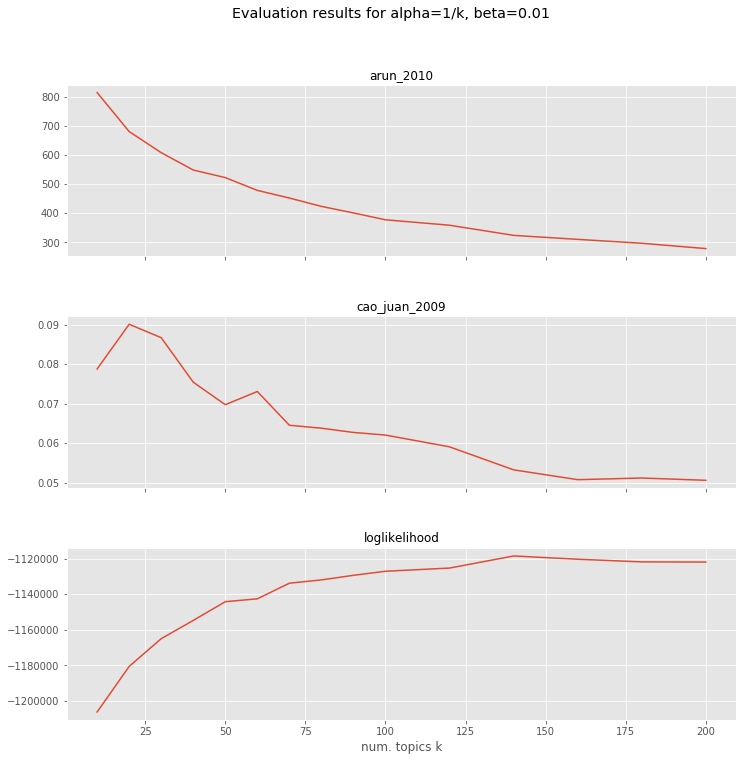

In [21]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()



### alpha: 1/k beta: 0,1

In [22]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20)) 
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 10
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 9360
INFO:lda:n_iter: 2000
INFO:lda:n_words: 190550
INFO:lda:n_topics: 20
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 60
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 140
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:vocab_size: 9360
INFO:lda:n_iter: 2000
INFO:lda

INFO:lda:<70> log likelihood: -1229512
INFO:lda:<20> log likelihood: -1303407
INFO:lda:<50> log likelihood: -1223412
INFO:lda:<10> log likelihood: -1498757
INFO:lda:<80> log likelihood: -1226557
INFO:lda:<20> log likelihood: -1327061
INFO:lda:<10> log likelihood: -1480312
INFO:lda:<90> log likelihood: -1224992
INFO:lda:<60> log likelihood: -1220759
INFO:lda:<30> log likelihood: -1264478
INFO:lda:<10> log likelihood: -1536626
INFO:lda:<100> log likelihood: -1223821
INFO:lda:<30> log likelihood: -1275230
INFO:lda:<70> log likelihood: -1218073
INFO:lda:<20> log likelihood: -1338441
INFO:lda:<110> log likelihood: -1223404
INFO:lda:<10> log likelihood: -1515400
INFO:lda:<120> log likelihood: -1222993
INFO:lda:<40> log likelihood: -1246796
INFO:lda:<30> log likelihood: -1277427
INFO:lda:<80> log likelihood: -1216357
INFO:lda:<10> log likelihood: -1567950
INFO:lda:<10> log likelihood: -1558825
INFO:lda:<130> log likelihood: -1223137
INFO:lda:<20> log likelihood: -1358350
INFO:lda:<20> log lik

INFO:lda:<610> log likelihood: -1217628
INFO:lda:<40> log likelihood: -1384180
INFO:lda:<90> log likelihood: -1256320
INFO:lda:<250> log likelihood: -1214760
INFO:lda:<160> log likelihood: -1219281
INFO:lda:<200> log likelihood: -1211711
INFO:lda:<100> log likelihood: -1247729
INFO:lda:<620> log likelihood: -1218130
INFO:lda:<390> log likelihood: -1206080
INFO:lda:<630> log likelihood: -1217569
INFO:lda:<260> log likelihood: -1214633
INFO:lda:<640> log likelihood: -1217492
INFO:lda:<400> log likelihood: -1207207
INFO:lda:<140> log likelihood: -1223809
INFO:lda:<110> log likelihood: -1235203
INFO:lda:<210> log likelihood: -1211586
INFO:lda:<650> log likelihood: -1217365
INFO:lda:<170> log likelihood: -1219153
INFO:lda:<410> log likelihood: -1207208
INFO:lda:<270> log likelihood: -1213950
INFO:lda:<660> log likelihood: -1218241
INFO:lda:<70> log likelihood: -1289109
INFO:lda:<670> log likelihood: -1217011
INFO:lda:<420> log likelihood: -1207178
INFO:lda:<220> log likelihood: -1211337
INF

INFO:lda:<200> log likelihood: -1228213
INFO:lda:<710> log likelihood: -1204630
INFO:lda:<480> log likelihood: -1206406
INFO:lda:<100> log likelihood: -1285677
INFO:lda:<300> log likelihood: -1216188
INFO:lda:<1160> log likelihood: -1217268
INFO:lda:<120> log likelihood: -1264635
INFO:lda:<250> log likelihood: -1217925
INFO:lda:<140> log likelihood: -1251065
INFO:lda:<1170> log likelihood: -1216842
INFO:lda:<720> log likelihood: -1205373
INFO:lda:<490> log likelihood: -1206465
INFO:lda:<1180> log likelihood: -1217154
INFO:lda:<380> log likelihood: -1208719
INFO:lda:<1190> log likelihood: -1217163
INFO:lda:<730> log likelihood: -1205158
INFO:lda:<310> log likelihood: -1216264
INFO:lda:<170> log likelihood: -1240640
INFO:lda:<1200> log likelihood: -1216857
INFO:lda:<500> log likelihood: -1206470
INFO:lda:<190> log likelihood: -1233679
INFO:lda:<70> log likelihood: -1340919
INFO:lda:<210> log likelihood: -1228093
INFO:lda:<260> log likelihood: -1218035
INFO:lda:<740> log likelihood: -1205

INFO:lda:<700> log likelihood: -1206611
INFO:lda:<1690> log likelihood: -1217179
INFO:lda:<300> log likelihood: -1224258
INFO:lda:<1030> log likelihood: -1203805
INFO:lda:<240> log likelihood: -1235319
INFO:lda:<1700> log likelihood: -1217347
INFO:lda:<370> log likelihood: -1214689
INFO:lda:<270> log likelihood: -1227415
INFO:lda:<1040> log likelihood: -1204117
INFO:lda:<110> log likelihood: -1307690
INFO:lda:<710> log likelihood: -1206558
INFO:lda:<550> log likelihood: -1207632
INFO:lda:<1710> log likelihood: -1216941
INFO:lda:<100> log likelihood: -1320056
INFO:lda:<1720> log likelihood: -1217289
INFO:lda:<1050> log likelihood: -1204881
INFO:lda:<450> log likelihood: -1214237
INFO:lda:<720> log likelihood: -1206126
INFO:lda:<150> log likelihood: -1267901
INFO:lda:<210> log likelihood: -1244742
INFO:lda:<1730> log likelihood: -1216582
INFO:lda:<1060> log likelihood: -1204812
INFO:lda:<180> log likelihood: -1252552
INFO:lda:<560> log likelihood: -1209076
INFO:lda:<310> log likelihood: 

INFO:lda:<320> log likelihood: -1231953
INFO:lda:<950> log likelihood: -1205607
INFO:lda:<730> log likelihood: -1206542
INFO:lda:<1390> log likelihood: -1204260
INFO:lda:<960> log likelihood: -1205494
INFO:lda:<1400> log likelihood: -1203847
INFO:lda:<410> log likelihood: -1221893
INFO:lda:<600> log likelihood: -1213309
INFO:lda:<280> log likelihood: -1240576
INFO:lda:<740> log likelihood: -1207215
INFO:lda:<500> log likelihood: -1213237
INFO:lda:<1410> log likelihood: -1204535
INFO:lda:<200> log likelihood: -1261128
INFO:lda:<970> log likelihood: -1204551
INFO:lda:<370> log likelihood: -1225804
INFO:lda:<150> log likelihood: -1295091
INFO:lda:<1420> log likelihood: -1204600
INFO:lda:<240> log likelihood: -1248498
INFO:lda:<750> log likelihood: -1207623
INFO:lda:<610> log likelihood: -1212800
INFO:lda:<980> log likelihood: -1204522
INFO:lda:<330> log likelihood: -1232258
INFO:lda:<1430> log likelihood: -1204750
INFO:lda:<170> log likelihood: -1277422
INFO:lda:<420> log likelihood: -122

INFO:lda:<790> log likelihood: -1212059
INFO:lda:<1830> log likelihood: -1203761
INFO:lda:<540> log likelihood: -1222341
INFO:lda:<1260> log likelihood: -1204377
INFO:lda:<260> log likelihood: -1256057
INFO:lda:<1840> log likelihood: -1203107
INFO:lda:<650> log likelihood: -1212558
INFO:lda:<480> log likelihood: -1224130
INFO:lda:<970> log likelihood: -1207021
INFO:lda:<1270> log likelihood: -1204966
INFO:lda:<310> log likelihood: -1244824
INFO:lda:<220> log likelihood: -1271047
INFO:lda:<1850> log likelihood: -1203684
INFO:lda:<800> log likelihood: -1211096
INFO:lda:<370> log likelihood: -1235786
INFO:lda:<1860> log likelihood: -1203452
INFO:lda:<1280> log likelihood: -1204916
INFO:lda:<430> log likelihood: -1228910
INFO:lda:<980> log likelihood: -1206635
INFO:lda:<550> log likelihood: -1221794
INFO:lda:<1870> log likelihood: -1203550
INFO:lda:<660> log likelihood: -1213474
INFO:lda:<1290> log likelihood: -1204921
INFO:lda:<810> log likelihood: -1211578
INFO:lda:<1880> log likelihood:

INFO:lda:<1230> log likelihood: -1207006
INFO:lda:<330> log likelihood: -1252233
INFO:lda:<1610> log likelihood: -1202775
INFO:lda:<1000> log likelihood: -1211657
INFO:lda:<390> log likelihood: -1242006
INFO:lda:<280> log likelihood: -1266026
INFO:lda:<690> log likelihood: -1219998
INFO:lda:<540> log likelihood: -1227263
INFO:lda:<1240> log likelihood: -1206763
INFO:lda:<1620> log likelihood: -1203497
INFO:lda:<830> log likelihood: -1213167
INFO:lda:<610> log likelihood: -1222556
INFO:lda:<1010> log likelihood: -1211013
INFO:lda:<1630> log likelihood: -1204262
INFO:lda:<470> log likelihood: -1236304
INFO:lda:<250> log likelihood: -1281324
INFO:lda:<1250> log likelihood: -1205888
INFO:lda:<1640> log likelihood: -1203469
INFO:lda:<700> log likelihood: -1220616
INFO:lda:<840> log likelihood: -1211745
INFO:lda:<1020> log likelihood: -1210759
INFO:lda:<1260> log likelihood: -1206619
INFO:lda:<550> log likelihood: -1227764
INFO:lda:<1650> log likelihood: -1204270
INFO:lda:<400> log likelihoo

INFO:lda:<1020> log likelihood: -1211257
INFO:lda:<1240> log likelihood: -1212331
INFO:lda:<1999> log likelihood: -1203961
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1203522.097849
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.078675
INFO:lda:<750> log likelihood: -1221986
INFO:lda:<1530> log likelihood: -1204591
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 620.995107
INFO:lda:<410> log likelihood: -1250764
INFO:lda:<670> log likelihood: -1226115
INFO:lda:<350> log likelihood: -1260518
INFO:lda:<580> log likelihood: -1234813
INFO:lda:<1540> log likelihood: -1206283
INFO:lda:<1250> log likelihood: -1211476
INFO:lda:<1030> log likelihood: -1211770
INFO:lda:<860> log likelihood: -1219869
INFO:lda:<490> log likelihood: -1241020
INFO:lda:<1550> log likelihood: -1205923
INFO:lda:<310> log likelihood: -1274938
INFO:lda:<760> log likelihood: -1221532
INFO:lda:<1260> log likelihood: -1211172
INFO:lda:<1040> log likelihood: -1212031
INFO:l

INFO:lda:<1880> log likelihood: -1205829
INFO:lda:<1050> log likelihood: -1219474
INFO:lda:<820> log likelihood: -1225664
INFO:lda:<1260> log likelihood: -1210038
INFO:lda:<430> log likelihood: -1260417
INFO:lda:<1890> log likelihood: -1205215
INFO:lda:<1530> log likelihood: -1211004
INFO:lda:<1270> log likelihood: -1209874
INFO:lda:<1060> log likelihood: -1218728
INFO:lda:<380> log likelihood: -1271264
INFO:lda:<1900> log likelihood: -1205072
INFO:lda:<600> log likelihood: -1239294
INFO:lda:<930> log likelihood: -1220415
INFO:lda:<340> log likelihood: -1278485
INFO:lda:<720> log likelihood: -1232932
INFO:lda:<510> log likelihood: -1248739
INFO:lda:<830> log likelihood: -1226796
INFO:lda:<1540> log likelihood: -1211793
INFO:lda:<1910> log likelihood: -1205921
INFO:lda:<1280> log likelihood: -1209841
INFO:lda:<1070> log likelihood: -1218596
INFO:lda:<1550> log likelihood: -1211603
INFO:lda:<1920> log likelihood: -1205081
INFO:lda:<940> log likelihood: -1220630
INFO:lda:<1290> log likeli

INFO:lda:<1120> log likelihood: -1220113
INFO:lda:<1850> log likelihood: -1210625
INFO:lda:<410> log likelihood: -1273639
INFO:lda:<870> log likelihood: -1231805
INFO:lda:<1280> log likelihood: -1218782
INFO:lda:<1000> log likelihood: -1225267
INFO:lda:<460> log likelihood: -1268814
INFO:lda:<1540> log likelihood: -1210306
INFO:lda:<1860> log likelihood: -1210732
INFO:lda:<1130> log likelihood: -1220355
INFO:lda:<1290> log likelihood: -1218884
INFO:lda:<1870> log likelihood: -1210096
INFO:lda:<1550> log likelihood: -1210742
INFO:lda:<730> log likelihood: -1239150
INFO:lda:<620> log likelihood: -1247087
INFO:lda:<1010> log likelihood: -1225712
INFO:lda:<880> log likelihood: -1232570
INFO:lda:<1880> log likelihood: -1209488
INFO:lda:<1140> log likelihood: -1220158
INFO:lda:<530> log likelihood: -1257901
INFO:lda:<1560> log likelihood: -1210027
INFO:lda:<1300> log likelihood: -1218257
INFO:lda:<1890> log likelihood: -1210159
INFO:lda:<1020> log likelihood: -1224996
INFO:lda:<1570> log lik

INFO:lda:<1860> log likelihood: -1210348
INFO:lda:<1550> log likelihood: -1218515
INFO:lda:<1360> log likelihood: -1220108
INFO:lda:<1210> log likelihood: -1224706
INFO:lda:<1870> log likelihood: -1209206
INFO:lda:<560> log likelihood: -1267488
INFO:lda:<880> log likelihood: -1239228
INFO:lda:<1560> log likelihood: -1218972
INFO:lda:<500> log likelihood: -1271478
INFO:lda:<1370> log likelihood: -1219993
INFO:lda:<1060> log likelihood: -1231286
INFO:lda:<750> log likelihood: -1247379
INFO:lda:<1880> log likelihood: -1209507
INFO:lda:<1220> log likelihood: -1225032
INFO:lda:<640> log likelihood: -1257545
INFO:lda:<1570> log likelihood: -1217660
INFO:lda:<1380> log likelihood: -1221302
INFO:lda:<1890> log likelihood: -1210616
INFO:lda:<890> log likelihood: -1238298
INFO:lda:<1070> log likelihood: -1231549
INFO:lda:<1580> log likelihood: -1218940
INFO:lda:<1230> log likelihood: -1225634
INFO:lda:<1900> log likelihood: -1208399
INFO:lda:<1390> log likelihood: -1219073
INFO:lda:<570> log lik

INFO:lda:<1060> log likelihood: -1238014
INFO:lda:<1890> log likelihood: -1217614
INFO:lda:<900> log likelihood: -1246219
INFO:lda:<1650> log likelihood: -1219071
INFO:lda:<770> log likelihood: -1255454
INFO:lda:<680> log likelihood: -1264632
INFO:lda:<1900> log likelihood: -1216964
INFO:lda:<1470> log likelihood: -1224238
INFO:lda:<1290> log likelihood: -1230661
INFO:lda:<1660> log likelihood: -1220062
INFO:lda:<1070> log likelihood: -1238514
INFO:lda:<610> log likelihood: -1271005
INFO:lda:<1910> log likelihood: -1218138
INFO:lda:<1480> log likelihood: -1223986
INFO:lda:<910> log likelihood: -1246431
INFO:lda:<1670> log likelihood: -1218594
INFO:lda:<1300> log likelihood: -1231313
INFO:lda:<1920> log likelihood: -1217234
INFO:lda:<780> log likelihood: -1256547
INFO:lda:<1080> log likelihood: -1238556
INFO:lda:<1490> log likelihood: -1224771
INFO:lda:<690> log likelihood: -1264510
INFO:lda:<1680> log likelihood: -1218216
INFO:lda:<1310> log likelihood: -1230709
INFO:lda:<1930> log lik

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.062245
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 491.516131
INFO:lda:<1290> log likelihood: -1238118
INFO:lda:<1560> log likelihood: -1230285
INFO:lda:<1790> log likelihood: -1224226
INFO:lda:<1100> log likelihood: -1245744
INFO:lda:<1570> log likelihood: -1231431
INFO:lda:<940> log likelihood: -1254861
INFO:lda:<1300> log likelihood: -1237203
INFO:lda:<830> log likelihood: -1263035
INFO:lda:<740> log likelihood: -1268990
INFO:lda:<1800> log likelihood: -1224250
INFO:lda:<1580> log likelihood: -1230397
INFO:lda:<1110> log likelihood: -1245434
INFO:lda:<1810> log likelihood: -1223771
INFO:lda:<1310> log likelihood: -1236799
INFO:lda:<950> log likelihood: -1255122
INFO:lda:<1590> log likelihood: -1229061
INFO:lda:<840> log likelihood: -1263417
INFO:lda:<1820> log likelihood: -1223536
INFO:lda:<1120> log likelihood: -1244665
INFO:lda:<750> log likelihood: -1268724
INFO:lda:<1320> log likelihood: -1236492
I

INFO:lda:<1040> log likelihood: -1262994
INFO:lda:<930> log likelihood: -1268321
INFO:lda:<1180> log likelihood: -1252243
INFO:lda:<1980> log likelihood: -1228161
INFO:lda:<1390> log likelihood: -1244081
INFO:lda:<1640> log likelihood: -1236143
INFO:lda:<1990> log likelihood: -1228637
INFO:lda:<1050> log likelihood: -1263342
INFO:lda:<1190> log likelihood: -1252281
INFO:lda:<1400> log likelihood: -1243550
INFO:lda:<940> log likelihood: -1267091
INFO:lda:<1999> log likelihood: -1228171
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1228636.628889
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.060061
INFO:lda:<1650> log likelihood: -1236520
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 473.558272
INFO:lda:<1410> log likelihood: -1242806
INFO:lda:<1200> log likelihood: -1252022
INFO:lda:<1660> log likelihood: -1236178
INFO:lda:<1060> log likelihood: -1263513
INFO:lda:<950> log likelihood: -1267920
INFO:lda:<1420> log likelihood: -1243203


INFO:lda:<1840> log likelihood: -1242770
INFO:lda:<1240> log likelihood: -1267445
INFO:lda:<1570> log likelihood: -1251333
INFO:lda:<1850> log likelihood: -1242344
INFO:lda:<1390> log likelihood: -1262366
INFO:lda:<1250> log likelihood: -1266729
INFO:lda:<1580> log likelihood: -1251588
INFO:lda:<1860> log likelihood: -1243109
INFO:lda:<1400> log likelihood: -1261605
INFO:lda:<1870> log likelihood: -1242327
INFO:lda:<1590> log likelihood: -1250740
INFO:lda:<1260> log likelihood: -1266237
INFO:lda:<1410> log likelihood: -1261453
INFO:lda:<1880> log likelihood: -1242549
INFO:lda:<1600> log likelihood: -1251418
INFO:lda:<1270> log likelihood: -1265912
INFO:lda:<1890> log likelihood: -1243938
INFO:lda:<1420> log likelihood: -1261570
INFO:lda:<1610> log likelihood: -1251853
INFO:lda:<1900> log likelihood: -1241489
INFO:lda:<1280> log likelihood: -1267224
INFO:lda:<1430> log likelihood: -1261944
INFO:lda:<1620> log likelihood: -1251699
INFO:lda:<1910> log likelihood: -1242196
INFO:lda:<1440> 

INFO:lda:<1850> log likelihood: -1265524
INFO:lda:<1860> log likelihood: -1265154
INFO:lda:<1870> log likelihood: -1265856
INFO:lda:<1880> log likelihood: -1264386
INFO:lda:<1890> log likelihood: -1264325
INFO:lda:<1900> log likelihood: -1264011
INFO:lda:<1910> log likelihood: -1265224
INFO:lda:<1920> log likelihood: -1264193
INFO:lda:<1930> log likelihood: -1264584
INFO:lda:<1940> log likelihood: -1264417
INFO:lda:<1950> log likelihood: -1263863
INFO:lda:<1960> log likelihood: -1264790
INFO:lda:<1970> log likelihood: -1264416
INFO:lda:<1980> log likelihood: -1265051
INFO:lda:<1990> log likelihood: -1265154
INFO:lda:<1999> log likelihood: -1264516
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1265153.758908
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.062161
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 449.153937


plotting evaluation results


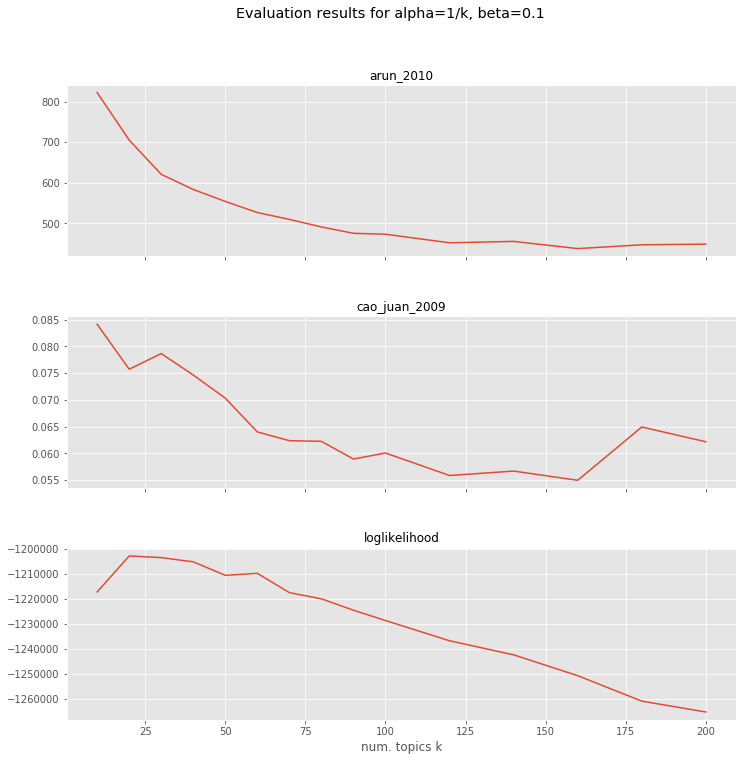

In [23]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [24]:
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("cao : %s \t %s" % (caoScore, caoTopics))        
print("arun: %s \t %s" % (arunScore, arunTopics))
    

cao : 0.054954058212407016 	 160
arun: 438.201480473481 	 160


### alpha: 0.1 beta: 1/(10*k)

In [25]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:n_words: 190550
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_topics: 30
INFO:lda:n_topics: 90
INFO:lda:n_words: 190550
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_iter: 2000
INFO:lda:n_t

INFO:lda:<70> log likelihood: -1229860
INFO:lda:<10> log likelihood: -1414641
INFO:lda:<10> log likelihood: -1467524
INFO:lda:<30> log likelihood: -1253980
INFO:lda:<80> log likelihood: -1226989
INFO:lda:<20> log likelihood: -1290597
INFO:lda:<40> log likelihood: -1244178
INFO:lda:<90> log likelihood: -1224939
INFO:lda:<20> log likelihood: -1313112
INFO:lda:<10> log likelihood: -1422098
INFO:lda:<30> log likelihood: -1281028
INFO:lda:<50> log likelihood: -1237879
INFO:lda:<100> log likelihood: -1223550
INFO:lda:<10> log likelihood: -1443548
INFO:lda:<40> log likelihood: -1248110
INFO:lda:<10> log likelihood: -1485280
INFO:lda:<110> log likelihood: -1221634
INFO:lda:<30> log likelihood: -1267354
INFO:lda:<60> log likelihood: -1234104
INFO:lda:<120> log likelihood: -1220329
INFO:lda:<20> log likelihood: -1314466
INFO:lda:<50> log likelihood: -1243095
INFO:lda:<130> log likelihood: -1220108
INFO:lda:<10> log likelihood: -1497758
INFO:lda:<70> log likelihood: -1230562
INFO:lda:<40> log lik

INFO:lda:<200> log likelihood: -1232135
INFO:lda:<80> log likelihood: -1281238
INFO:lda:<170> log likelihood: -1244773
INFO:lda:<610> log likelihood: -1207768
INFO:lda:<250> log likelihood: -1215221
INFO:lda:<370> log likelihood: -1206028
INFO:lda:<620> log likelihood: -1207697
INFO:lda:<100> log likelihood: -1265095
INFO:lda:<70> log likelihood: -1312654
INFO:lda:<630> log likelihood: -1207557
INFO:lda:<50> log likelihood: -1352788
INFO:lda:<260> log likelihood: -1215790
INFO:lda:<640> log likelihood: -1207815
INFO:lda:<210> log likelihood: -1231564
INFO:lda:<380> log likelihood: -1204304
INFO:lda:<120> log likelihood: -1254830
INFO:lda:<80> log likelihood: -1290227
INFO:lda:<650> log likelihood: -1207557
INFO:lda:<140> log likelihood: -1249409
INFO:lda:<180> log likelihood: -1243759
INFO:lda:<270> log likelihood: -1214350
INFO:lda:<660> log likelihood: -1207822
INFO:lda:<390> log likelihood: -1204538
INFO:lda:<220> log likelihood: -1229723
INFO:lda:<670> log likelihood: -1207064
INFO

INFO:lda:<310> log likelihood: -1236021
INFO:lda:<670> log likelihood: -1201811
INFO:lda:<250> log likelihood: -1240247
INFO:lda:<1160> log likelihood: -1207535
INFO:lda:<380> log likelihood: -1224666
INFO:lda:<80> log likelihood: -1353490
INFO:lda:<680> log likelihood: -1202532
INFO:lda:<1170> log likelihood: -1206066
INFO:lda:<480> log likelihood: -1208004
INFO:lda:<190> log likelihood: -1255364
INFO:lda:<90> log likelihood: -1336831
INFO:lda:<1180> log likelihood: -1206600
INFO:lda:<100> log likelihood: -1318589
INFO:lda:<1190> log likelihood: -1206729
INFO:lda:<160> log likelihood: -1270452
INFO:lda:<220> log likelihood: -1247155
INFO:lda:<690> log likelihood: -1201912
INFO:lda:<390> log likelihood: -1224153
INFO:lda:<320> log likelihood: -1235247
INFO:lda:<70> log likelihood: -1365558
INFO:lda:<490> log likelihood: -1207678
INFO:lda:<1200> log likelihood: -1207229
INFO:lda:<150> log likelihood: -1277393
INFO:lda:<700> log likelihood: -1201848
INFO:lda:<260> log likelihood: -124118

INFO:lda:<210> log likelihood: -1272645
INFO:lda:<230> log likelihood: -1264319
INFO:lda:<1680> log likelihood: -1206375
INFO:lda:<1000> log likelihood: -1201277
INFO:lda:<700> log likelihood: -1205646
INFO:lda:<1690> log likelihood: -1206059
INFO:lda:<450> log likelihood: -1233436
INFO:lda:<560> log likelihood: -1221357
INFO:lda:<1700> log likelihood: -1206316
INFO:lda:<100> log likelihood: -1356897
INFO:lda:<1010> log likelihood: -1201191
INFO:lda:<1710> log likelihood: -1206041
INFO:lda:<180> log likelihood: -1294019
INFO:lda:<370> log likelihood: -1237315
INFO:lda:<710> log likelihood: -1205504
INFO:lda:<130> log likelihood: -1329543
INFO:lda:<280> log likelihood: -1249456
INFO:lda:<1720> log likelihood: -1206083
INFO:lda:<1020> log likelihood: -1200626
INFO:lda:<320> log likelihood: -1242538
INFO:lda:<1730> log likelihood: -1206089
INFO:lda:<570> log likelihood: -1220797
INFO:lda:<460> log likelihood: -1232991
INFO:lda:<720> log likelihood: -1205634
INFO:lda:<1030> log likelihood:

INFO:lda:<490> log likelihood: -1236092
INFO:lda:<170> log likelihood: -1325202
INFO:lda:<950> log likelihood: -1204248
INFO:lda:<600> log likelihood: -1232079
INFO:lda:<1360> log likelihood: -1201205
INFO:lda:<310> log likelihood: -1260500
INFO:lda:<420> log likelihood: -1239421
INFO:lda:<750> log likelihood: -1219831
INFO:lda:<1370> log likelihood: -1200453
INFO:lda:<960> log likelihood: -1203568
INFO:lda:<370> log likelihood: -1246232
INFO:lda:<500> log likelihood: -1235478
INFO:lda:<1380> log likelihood: -1200588
INFO:lda:<240> log likelihood: -1288398
INFO:lda:<610> log likelihood: -1232186
INFO:lda:<970> log likelihood: -1203671
INFO:lda:<760> log likelihood: -1218703
INFO:lda:<1390> log likelihood: -1200103
INFO:lda:<290> log likelihood: -1269137
INFO:lda:<430> log likelihood: -1238872
INFO:lda:<980> log likelihood: -1203486
INFO:lda:<200> log likelihood: -1305346
INFO:lda:<1400> log likelihood: -1200726
INFO:lda:<320> log likelihood: -1260697
INFO:lda:<620> log likelihood: -123

INFO:lda:<480> log likelihood: -1245617
INFO:lda:<1790> log likelihood: -1200172
INFO:lda:<980> log likelihood: -1218599
INFO:lda:<1260> log likelihood: -1203096
INFO:lda:<790> log likelihood: -1231361
INFO:lda:<650> log likelihood: -1234868
INFO:lda:<200> log likelihood: -1334749
INFO:lda:<1800> log likelihood: -1200185
INFO:lda:<310> log likelihood: -1285298
INFO:lda:<1270> log likelihood: -1203258
INFO:lda:<1810> log likelihood: -1199676
INFO:lda:<990> log likelihood: -1218874
INFO:lda:<560> log likelihood: -1238114
INFO:lda:<1280> log likelihood: -1203107
INFO:lda:<260> log likelihood: -1300593
INFO:lda:<1820> log likelihood: -1199965
INFO:lda:<800> log likelihood: -1231341
INFO:lda:<660> log likelihood: -1234665
INFO:lda:<380> log likelihood: -1265971
INFO:lda:<490> log likelihood: -1243497
INFO:lda:<1000> log likelihood: -1218341
INFO:lda:<1830> log likelihood: -1200940
INFO:lda:<420> log likelihood: -1257360
INFO:lda:<1290> log likelihood: -1203097
INFO:lda:<230> log likelihood:

INFO:lda:<1600> log likelihood: -1202487
INFO:lda:<700> log likelihood: -1235139
INFO:lda:<390> log likelihood: -1281277
INFO:lda:<520> log likelihood: -1254787
INFO:lda:<250> log likelihood: -1331664
INFO:lda:<220> log likelihood: -1337703
INFO:lda:<1240> log likelihood: -1218708
INFO:lda:<610> log likelihood: -1242971
INFO:lda:<1610> log likelihood: -1202516
INFO:lda:<1000> log likelihood: -1230588
INFO:lda:<830> log likelihood: -1233151
INFO:lda:<1620> log likelihood: -1201925
INFO:lda:<1250> log likelihood: -1217625
INFO:lda:<710> log likelihood: -1235708
INFO:lda:<1010> log likelihood: -1231038
INFO:lda:<1630> log likelihood: -1202372
INFO:lda:<480> log likelihood: -1264505
INFO:lda:<840> log likelihood: -1233228
INFO:lda:<1260> log likelihood: -1218364
INFO:lda:<330> log likelihood: -1296823
INFO:lda:<530> log likelihood: -1255859
INFO:lda:<620> log likelihood: -1242865
INFO:lda:<1640> log likelihood: -1201991
INFO:lda:<290> log likelihood: -1317107
INFO:lda:<1270> log likelihood

INFO:lda:<1230> log likelihood: -1229258
INFO:lda:<480> log likelihood: -1279729
INFO:lda:<350> log likelihood: -1314547
INFO:lda:<750> log likelihood: -1241461
INFO:lda:<1540> log likelihood: -1216669
INFO:lda:<1999> log likelihood: -1202144
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1201722.984145
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.054137
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 577.410414
INFO:lda:<870> log likelihood: -1234215
INFO:lda:<650> log likelihood: -1255516
INFO:lda:<310> log likelihood: -1328302
INFO:lda:<1550> log likelihood: -1217214
INFO:lda:<1240> log likelihood: -1229358
INFO:lda:<590> log likelihood: -1260886
INFO:lda:<1030> log likelihood: -1231906
INFO:lda:<410> log likelihood: -1294367
INFO:lda:<880> log likelihood: -1233869
INFO:lda:<1560> log likelihood: -1217073
INFO:lda:<760> log likelihood: -1240812
INFO:lda:<1250> log likelihood: -1228963
INFO:lda:<660> log likelihood: -1254856
INFO:lda

INFO:lda:<920> log likelihood: -1240281
INFO:lda:<1260> log likelihood: -1231118
INFO:lda:<800> log likelihood: -1254716
INFO:lda:<1070> log likelihood: -1233625
INFO:lda:<1900> log likelihood: -1216504
INFO:lda:<380> log likelihood: -1325471
INFO:lda:<1520> log likelihood: -1227708
INFO:lda:<430> log likelihood: -1311576
INFO:lda:<500> log likelihood: -1291766
INFO:lda:<1270> log likelihood: -1231470
INFO:lda:<1910> log likelihood: -1216372
INFO:lda:<1080> log likelihood: -1234035
INFO:lda:<930> log likelihood: -1240675
INFO:lda:<1530> log likelihood: -1227244
INFO:lda:<730> log likelihood: -1259375
INFO:lda:<810> log likelihood: -1254740
INFO:lda:<1920> log likelihood: -1216249
INFO:lda:<600> log likelihood: -1277755
INFO:lda:<1280> log likelihood: -1231738
INFO:lda:<1540> log likelihood: -1227198
INFO:lda:<1090> log likelihood: -1233918
INFO:lda:<1930> log likelihood: -1215799
INFO:lda:<940> log likelihood: -1240845
INFO:lda:<340> log likelihood: -1333174
INFO:lda:<1940> log likelih

INFO:lda:<1530> log likelihood: -1229956
INFO:lda:<980> log likelihood: -1254385
INFO:lda:<600> log likelihood: -1290429
INFO:lda:<1850> log likelihood: -1226612
INFO:lda:<1130> log likelihood: -1239940
INFO:lda:<880> log likelihood: -1257677
INFO:lda:<460> log likelihood: -1322839
INFO:lda:<1310> log likelihood: -1233400
INFO:lda:<1540> log likelihood: -1230770
INFO:lda:<1860> log likelihood: -1226691
INFO:lda:<990> log likelihood: -1254038
INFO:lda:<1140> log likelihood: -1240184
INFO:lda:<730> log likelihood: -1276631
INFO:lda:<1550> log likelihood: -1229967
INFO:lda:<1870> log likelihood: -1226297
INFO:lda:<1320> log likelihood: -1233035
INFO:lda:<410> log likelihood: -1329126
INFO:lda:<890> log likelihood: -1256896
INFO:lda:<1880> log likelihood: -1226528
INFO:lda:<530> log likelihood: -1308801
INFO:lda:<1560> log likelihood: -1230314
INFO:lda:<1150> log likelihood: -1239941
INFO:lda:<610> log likelihood: -1290510
INFO:lda:<1000> log likelihood: -1254487
INFO:lda:<1330> log likeli

INFO:lda:<1850> log likelihood: -1230870
INFO:lda:<1580> log likelihood: -1233262
INFO:lda:<1370> log likelihood: -1239506
INFO:lda:<1190> log likelihood: -1253512
INFO:lda:<1860> log likelihood: -1229840
INFO:lda:<1070> log likelihood: -1256717
INFO:lda:<730> log likelihood: -1289482
INFO:lda:<1380> log likelihood: -1239061
INFO:lda:<880> log likelihood: -1275731
INFO:lda:<1590> log likelihood: -1232404
INFO:lda:<1870> log likelihood: -1230717
INFO:lda:<1200> log likelihood: -1253299
INFO:lda:<640> log likelihood: -1306236
INFO:lda:<500> log likelihood: -1326990
INFO:lda:<1080> log likelihood: -1256406
INFO:lda:<1880> log likelihood: -1230354
INFO:lda:<1600> log likelihood: -1233111
INFO:lda:<1390> log likelihood: -1239252
INFO:lda:<560> log likelihood: -1320902
INFO:lda:<1210> log likelihood: -1253180
INFO:lda:<740> log likelihood: -1290021
INFO:lda:<1890> log likelihood: -1229356
INFO:lda:<890> log likelihood: -1275660
INFO:lda:<1610> log likelihood: -1232614
INFO:lda:<1090> log lik

INFO:lda:<770> log likelihood: -1305256
INFO:lda:<600> log likelihood: -1325386
INFO:lda:<1060> log likelihood: -1274832
INFO:lda:<670> log likelihood: -1317625
INFO:lda:<1660> log likelihood: -1238464
INFO:lda:<1920> log likelihood: -1232285
INFO:lda:<1450> log likelihood: -1251582
INFO:lda:<1670> log likelihood: -1238763
INFO:lda:<1300> log likelihood: -1255932
INFO:lda:<1070> log likelihood: -1275731
INFO:lda:<890> log likelihood: -1288075
INFO:lda:<1930> log likelihood: -1232228
INFO:lda:<780> log likelihood: -1305027
INFO:lda:<1460> log likelihood: -1252003
INFO:lda:<1680> log likelihood: -1238166
INFO:lda:<680> log likelihood: -1318065
INFO:lda:<1310> log likelihood: -1255331
INFO:lda:<1940> log likelihood: -1232471
INFO:lda:<610> log likelihood: -1324202
INFO:lda:<1080> log likelihood: -1275657
INFO:lda:<1690> log likelihood: -1238113
INFO:lda:<1470> log likelihood: -1251991
INFO:lda:<1950> log likelihood: -1232505
INFO:lda:<900> log likelihood: -1288385
INFO:lda:<1320> log like

INFO:lda:<940> log likelihood: -1304759
INFO:lda:<820> log likelihood: -1317149
INFO:lda:<1750> log likelihood: -1251645
INFO:lda:<1080> log likelihood: -1287728
INFO:lda:<1580> log likelihood: -1254637
INFO:lda:<1760> log likelihood: -1251690
INFO:lda:<1300> log likelihood: -1274538
INFO:lda:<950> log likelihood: -1304679
INFO:lda:<1590> log likelihood: -1254734
INFO:lda:<1770> log likelihood: -1251742
INFO:lda:<830> log likelihood: -1316931
INFO:lda:<740> log likelihood: -1323639
INFO:lda:<1090> log likelihood: -1287271
INFO:lda:<1310> log likelihood: -1274297
INFO:lda:<1780> log likelihood: -1251765
INFO:lda:<1600> log likelihood: -1255053
INFO:lda:<960> log likelihood: -1304548
INFO:lda:<1100> log likelihood: -1287238
INFO:lda:<1320> log likelihood: -1273904
INFO:lda:<1790> log likelihood: -1251658
INFO:lda:<1610> log likelihood: -1254200
INFO:lda:<840> log likelihood: -1315613
INFO:lda:<750> log likelihood: -1323790
INFO:lda:<1800> log likelihood: -1251871
INFO:lda:<1330> log like

INFO:lda:<1370> log likelihood: -1286287
INFO:lda:<1990> log likelihood: -1254750
INFO:lda:<1190> log likelihood: -1301477
INFO:lda:<1640> log likelihood: -1273660
INFO:lda:<1040> log likelihood: -1314745
INFO:lda:<1999> log likelihood: -1254541
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1254749.999971
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.031857
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 315.684047
INFO:lda:<1380> log likelihood: -1286449
INFO:lda:<1650> log likelihood: -1273649
INFO:lda:<930> log likelihood: -1320991
INFO:lda:<1200> log likelihood: -1301659
INFO:lda:<1050> log likelihood: -1316070
INFO:lda:<1660> log likelihood: -1274735
INFO:lda:<1390> log likelihood: -1286494
INFO:lda:<1210> log likelihood: -1301846
INFO:lda:<940> log likelihood: -1320357
INFO:lda:<1670> log likelihood: -1273210
INFO:lda:<1400> log likelihood: -1286287
INFO:lda:<1060> log likelihood: -1314739
INFO:lda:<1220> log likelihood: -1301832

INFO:lda:<1580> log likelihood: -1300551
INFO:lda:<1230> log likelihood: -1319553
INFO:lda:<1840> log likelihood: -1285200
INFO:lda:<1590> log likelihood: -1299986
INFO:lda:<1390> log likelihood: -1311977
INFO:lda:<1240> log likelihood: -1319600
INFO:lda:<1850> log likelihood: -1284826
INFO:lda:<1600> log likelihood: -1300961
INFO:lda:<1400> log likelihood: -1312916
INFO:lda:<1250> log likelihood: -1318767
INFO:lda:<1860> log likelihood: -1284945
INFO:lda:<1610> log likelihood: -1299737
INFO:lda:<1870> log likelihood: -1284546
INFO:lda:<1410> log likelihood: -1312075
INFO:lda:<1260> log likelihood: -1318972
INFO:lda:<1620> log likelihood: -1299772
INFO:lda:<1880> log likelihood: -1284492
INFO:lda:<1420> log likelihood: -1312343
INFO:lda:<1630> log likelihood: -1300594
INFO:lda:<1270> log likelihood: -1319388
INFO:lda:<1890> log likelihood: -1284410
INFO:lda:<1430> log likelihood: -1312817
INFO:lda:<1640> log likelihood: -1300154
INFO:lda:<1900> log likelihood: -1284743
INFO:lda:<1280> 

INFO:lda:<1850> log likelihood: -1317576
INFO:lda:<1860> log likelihood: -1317248
INFO:lda:<1870> log likelihood: -1317893
INFO:lda:<1880> log likelihood: -1316828
INFO:lda:<1890> log likelihood: -1316626
INFO:lda:<1900> log likelihood: -1316552
INFO:lda:<1910> log likelihood: -1317117
INFO:lda:<1920> log likelihood: -1317749
INFO:lda:<1930> log likelihood: -1316292
INFO:lda:<1940> log likelihood: -1316396
INFO:lda:<1950> log likelihood: -1316987
INFO:lda:<1960> log likelihood: -1317398
INFO:lda:<1970> log likelihood: -1317525
INFO:lda:<1980> log likelihood: -1317259
INFO:lda:<1990> log likelihood: -1317915
INFO:lda:<1999> log likelihood: -1317814
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1317915.068875
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.025311
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 185.631237


plotting evaluation results


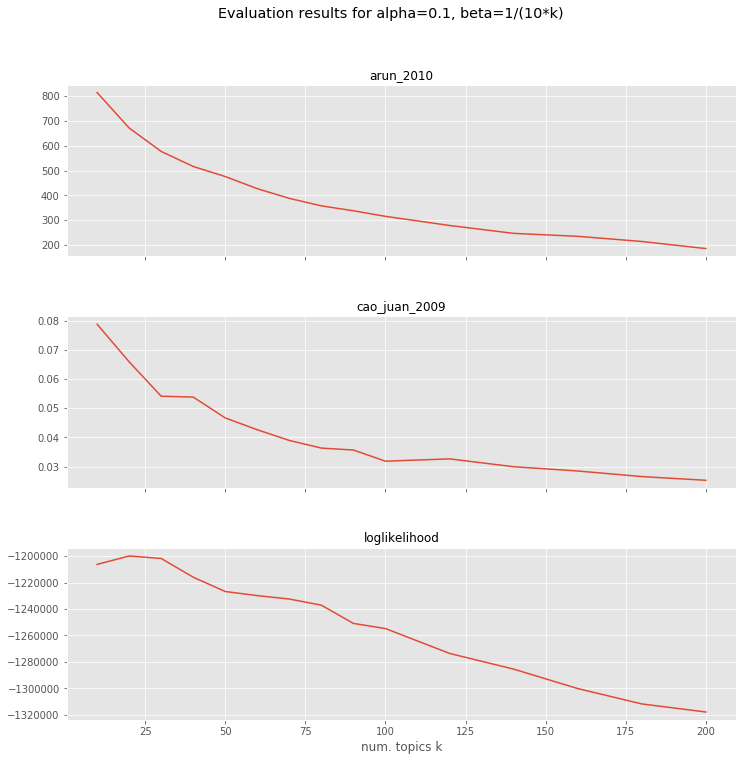

In [26]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 0.1 beta: 0.001

In [27]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_topics: 40
INFO:lda:n_topics: 50
INFO:lda:n_documents: 40214
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_topics: 70
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_topics: 80
INFO:lda:n_topics: 60
INFO:lda:n_documents: 40214
INFO

INFO:lda:<30> log likelihood: -1267082
INFO:lda:<70> log likelihood: -1262590
INFO:lda:<30> log likelihood: -1271416
INFO:lda:<10> log likelihood: -1427148
INFO:lda:<80> log likelihood: -1260819
INFO:lda:<20> log likelihood: -1304813
INFO:lda:<20> log likelihood: -1313004
INFO:lda:<40> log likelihood: -1258630
INFO:lda:<30> log likelihood: -1278104
INFO:lda:<10> log likelihood: -1461159
INFO:lda:<90> log likelihood: -1259062
INFO:lda:<40> log likelihood: -1262441
INFO:lda:<10> log likelihood: -1443548
INFO:lda:<100> log likelihood: -1256941
INFO:lda:<50> log likelihood: -1253018
INFO:lda:<20> log likelihood: -1321163
INFO:lda:<50> log likelihood: -1253488
INFO:lda:<110> log likelihood: -1255753
INFO:lda:<20> log likelihood: -1329253
INFO:lda:<40> log likelihood: -1267325
INFO:lda:<10> log likelihood: -1481054
INFO:lda:<120> log likelihood: -1254909
INFO:lda:<30> log likelihood: -1279143
INFO:lda:<30> log likelihood: -1288106
INFO:lda:<60> log likelihood: -1250119
INFO:lda:<60> log like

INFO:lda:<260> log likelihood: -1227635
INFO:lda:<40> log likelihood: -1369729
INFO:lda:<350> log likelihood: -1222840
INFO:lda:<610> log likelihood: -1233972
INFO:lda:<210> log likelihood: -1238311
INFO:lda:<620> log likelihood: -1234721
INFO:lda:<90> log likelihood: -1281632
INFO:lda:<140> log likelihood: -1250223
INFO:lda:<270> log likelihood: -1227657
INFO:lda:<360> log likelihood: -1222467
INFO:lda:<160> log likelihood: -1243140
INFO:lda:<630> log likelihood: -1234498
INFO:lda:<80> log likelihood: -1290227
INFO:lda:<120> log likelihood: -1260245
INFO:lda:<370> log likelihood: -1222454
INFO:lda:<640> log likelihood: -1234768
INFO:lda:<220> log likelihood: -1237962
INFO:lda:<280> log likelihood: -1227356
INFO:lda:<650> log likelihood: -1233829
INFO:lda:<110> log likelihood: -1269167
INFO:lda:<70> log likelihood: -1309010
INFO:lda:<380> log likelihood: -1221375
INFO:lda:<660> log likelihood: -1234020
INFO:lda:<170> log likelihood: -1243184
INFO:lda:<670> log likelihood: -1234261
INFO

INFO:lda:<190> log likelihood: -1260263
INFO:lda:<670> log likelihood: -1215951
INFO:lda:<1130> log likelihood: -1230780
INFO:lda:<160> log likelihood: -1272616
INFO:lda:<300> log likelihood: -1233654
INFO:lda:<500> log likelihood: -1221591
INFO:lda:<1140> log likelihood: -1230504
INFO:lda:<680> log likelihood: -1215487
INFO:lda:<390> log likelihood: -1230116
INFO:lda:<1150> log likelihood: -1230241
INFO:lda:<150> log likelihood: -1277393
INFO:lda:<260> log likelihood: -1241025
INFO:lda:<510> log likelihood: -1221270
INFO:lda:<1160> log likelihood: -1230165
INFO:lda:<690> log likelihood: -1215450
INFO:lda:<1170> log likelihood: -1230785
INFO:lda:<220> log likelihood: -1252246
INFO:lda:<310> log likelihood: -1233278
INFO:lda:<400> log likelihood: -1230476
INFO:lda:<1180> log likelihood: -1230563
INFO:lda:<700> log likelihood: -1215584
INFO:lda:<520> log likelihood: -1221345
INFO:lda:<200> log likelihood: -1260259
INFO:lda:<70> log likelihood: -1361820
INFO:lda:<1190> log likelihood: -12

INFO:lda:<110> log likelihood: -1338809
INFO:lda:<560> log likelihood: -1228174
INFO:lda:<1660> log likelihood: -1228841
INFO:lda:<370> log likelihood: -1237341
INFO:lda:<990> log likelihood: -1213339
INFO:lda:<730> log likelihood: -1219430
INFO:lda:<1670> log likelihood: -1228410
INFO:lda:<320> log likelihood: -1247320
INFO:lda:<280> log likelihood: -1257125
INFO:lda:<150> log likelihood: -1305175
INFO:lda:<1680> log likelihood: -1227937
INFO:lda:<450> log likelihood: -1228411
INFO:lda:<1000> log likelihood: -1213458
INFO:lda:<570> log likelihood: -1227148
INFO:lda:<740> log likelihood: -1219064
INFO:lda:<1690> log likelihood: -1228245
INFO:lda:<240> log likelihood: -1264674
INFO:lda:<1700> log likelihood: -1229255
INFO:lda:<180> log likelihood: -1292239
INFO:lda:<1010> log likelihood: -1212853
INFO:lda:<100> log likelihood: -1352926
INFO:lda:<380> log likelihood: -1236632
INFO:lda:<220> log likelihood: -1272356
INFO:lda:<1710> log likelihood: -1228643
INFO:lda:<750> log likelihood: -

INFO:lda:<740> log likelihood: -1225974
INFO:lda:<1320> log likelihood: -1211670
INFO:lda:<200> log likelihood: -1301104
INFO:lda:<430> log likelihood: -1244464
INFO:lda:<170> log likelihood: -1311401
INFO:lda:<500> log likelihood: -1234109
INFO:lda:<320> log likelihood: -1262391
INFO:lda:<1330> log likelihood: -1212311
INFO:lda:<600> log likelihood: -1227238
INFO:lda:<980> log likelihood: -1216884
INFO:lda:<1340> log likelihood: -1212170
INFO:lda:<150> log likelihood: -1333046
INFO:lda:<750> log likelihood: -1226078
INFO:lda:<240> log likelihood: -1289794
INFO:lda:<990> log likelihood: -1217184
INFO:lda:<380> log likelihood: -1253503
INFO:lda:<290> log likelihood: -1269137
INFO:lda:<610> log likelihood: -1226799
INFO:lda:<1350> log likelihood: -1212323
INFO:lda:<510> log likelihood: -1234477
INFO:lda:<1000> log likelihood: -1217446
INFO:lda:<440> log likelihood: -1244459
INFO:lda:<760> log likelihood: -1226409
INFO:lda:<1360> log likelihood: -1211603
INFO:lda:<1370> log likelihood: -1

INFO:lda:<560> log likelihood: -1242376
INFO:lda:<420> log likelihood: -1260581
INFO:lda:<490> log likelihood: -1250862
INFO:lda:<980> log likelihood: -1223641
INFO:lda:<1280> log likelihood: -1216552
INFO:lda:<1750> log likelihood: -1211329
INFO:lda:<310> log likelihood: -1285635
INFO:lda:<660> log likelihood: -1232671
INFO:lda:<790> log likelihood: -1223657
INFO:lda:<1290> log likelihood: -1216059
INFO:lda:<1760> log likelihood: -1210416
INFO:lda:<990> log likelihood: -1223293
INFO:lda:<380> log likelihood: -1265971
INFO:lda:<1300> log likelihood: -1216176
INFO:lda:<1770> log likelihood: -1210605
INFO:lda:<570> log likelihood: -1241733
INFO:lda:<500> log likelihood: -1250228
INFO:lda:<800> log likelihood: -1223901
INFO:lda:<430> log likelihood: -1260110
INFO:lda:<670> log likelihood: -1232505
INFO:lda:<1000> log likelihood: -1223219
INFO:lda:<1780> log likelihood: -1211356
INFO:lda:<1310> log likelihood: -1216208
INFO:lda:<200> log likelihood: -1328864
INFO:lda:<1790> log likelihood:

INFO:lda:<1590> log likelihood: -1215046
INFO:lda:<1220> log likelihood: -1220300
INFO:lda:<390> log likelihood: -1282849
INFO:lda:<830> log likelihood: -1230864
INFO:lda:<330> log likelihood: -1292552
INFO:lda:<1600> log likelihood: -1215116
INFO:lda:<1230> log likelihood: -1220029
INFO:lda:<990> log likelihood: -1223309
INFO:lda:<710> log likelihood: -1240758
INFO:lda:<620> log likelihood: -1250688
INFO:lda:<250> log likelihood: -1324370
INFO:lda:<540> log likelihood: -1258901
INFO:lda:<1610> log likelihood: -1214655
INFO:lda:<1240> log likelihood: -1219288
INFO:lda:<840> log likelihood: -1231360
INFO:lda:<1000> log likelihood: -1223592
INFO:lda:<480> log likelihood: -1264505
INFO:lda:<1620> log likelihood: -1215306
INFO:lda:<720> log likelihood: -1241124
INFO:lda:<400> log likelihood: -1283231
INFO:lda:<1250> log likelihood: -1219343
INFO:lda:<1630> log likelihood: -1215502
INFO:lda:<850> log likelihood: -1230887
INFO:lda:<630> log likelihood: -1249715
INFO:lda:<1010> log likelihood

INFO:lda:<350> log likelihood: -1301917
INFO:lda:<1230> log likelihood: -1223159
INFO:lda:<1520> log likelihood: -1218412
INFO:lda:<410> log likelihood: -1290844
INFO:lda:<1970> log likelihood: -1214903
INFO:lda:<880> log likelihood: -1240317
INFO:lda:<590> log likelihood: -1260886
INFO:lda:<1030> log likelihood: -1230090
INFO:lda:<310> log likelihood: -1321783
INFO:lda:<1980> log likelihood: -1215039
INFO:lda:<670> log likelihood: -1257476
INFO:lda:<1240> log likelihood: -1223149
INFO:lda:<1530> log likelihood: -1218150
INFO:lda:<770> log likelihood: -1248895
INFO:lda:<280> log likelihood: -1332885
INFO:lda:<490> log likelihood: -1278983
INFO:lda:<1990> log likelihood: -1214722
INFO:lda:<1040> log likelihood: -1230010
INFO:lda:<1540> log likelihood: -1218724
INFO:lda:<890> log likelihood: -1239707
INFO:lda:<1250> log likelihood: -1222385
INFO:lda:<1999> log likelihood: -1214959
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1214721.632424
INFO:tmtoolkit:> evaluation 

INFO:lda:<340> log likelihood: -1329999
INFO:lda:<1510> log likelihood: -1223374
INFO:lda:<1260> log likelihood: -1229406
INFO:lda:<1080> log likelihood: -1240091
INFO:lda:<1870> log likelihood: -1217983
INFO:lda:<600> log likelihood: -1276711
INFO:lda:<810> log likelihood: -1255921
INFO:lda:<430> log likelihood: -1299077
INFO:lda:<940> log likelihood: -1248124
INFO:lda:<1520> log likelihood: -1223185
INFO:lda:<380> log likelihood: -1319247
INFO:lda:<1880> log likelihood: -1217969
INFO:lda:<1270> log likelihood: -1229520
INFO:lda:<1090> log likelihood: -1239514
INFO:lda:<730> log likelihood: -1259375
INFO:lda:<950> log likelihood: -1248143
INFO:lda:<1890> log likelihood: -1217387
INFO:lda:<1530> log likelihood: -1222698
INFO:lda:<820> log likelihood: -1256278
INFO:lda:<1280> log likelihood: -1229134
INFO:lda:<510> log likelihood: -1289172
INFO:lda:<1900> log likelihood: -1217243
INFO:lda:<1100> log likelihood: -1239705
INFO:lda:<610> log likelihood: -1276937
INFO:lda:<1540> log likelih

INFO:lda:<1840> log likelihood: -1221656
INFO:lda:<1530> log likelihood: -1229418
INFO:lda:<1850> log likelihood: -1221741
INFO:lda:<980> log likelihood: -1256157
INFO:lda:<1310> log likelihood: -1238278
INFO:lda:<880> log likelihood: -1257677
INFO:lda:<1140> log likelihood: -1246636
INFO:lda:<610> log likelihood: -1287727
INFO:lda:<1540> log likelihood: -1229562
INFO:lda:<730> log likelihood: -1275209
INFO:lda:<1860> log likelihood: -1221248
INFO:lda:<520> log likelihood: -1298659
INFO:lda:<460> log likelihood: -1316394
INFO:lda:<1320> log likelihood: -1237754
INFO:lda:<1870> log likelihood: -1220916
INFO:lda:<1550> log likelihood: -1229202
INFO:lda:<990> log likelihood: -1255542
INFO:lda:<1150> log likelihood: -1245745
INFO:lda:<890> log likelihood: -1256896
INFO:lda:<1880> log likelihood: -1221324
INFO:lda:<420> log likelihood: -1327347
INFO:lda:<1560> log likelihood: -1229587
INFO:lda:<1330> log likelihood: -1237690
INFO:lda:<740> log likelihood: -1275278
INFO:lda:<1890> log likeli

INFO:lda:<1370> log likelihood: -1246091
INFO:lda:<1580> log likelihood: -1237986
INFO:lda:<1860> log likelihood: -1228993
INFO:lda:<500> log likelihood: -1325782
INFO:lda:<1070> log likelihood: -1256717
INFO:lda:<1190> log likelihood: -1254609
INFO:lda:<880> log likelihood: -1275001
INFO:lda:<1870> log likelihood: -1229398
INFO:lda:<1590> log likelihood: -1237008
INFO:lda:<1380> log likelihood: -1246312
INFO:lda:<740> log likelihood: -1285849
INFO:lda:<630> log likelihood: -1295605
INFO:lda:<560> log likelihood: -1314647
INFO:lda:<1880> log likelihood: -1229104
INFO:lda:<1080> log likelihood: -1256406
INFO:lda:<1200> log likelihood: -1254059
INFO:lda:<1600> log likelihood: -1237615
INFO:lda:<1390> log likelihood: -1246197
INFO:lda:<1890> log likelihood: -1228285
INFO:lda:<890> log likelihood: -1274132
INFO:lda:<1610> log likelihood: -1236972
INFO:lda:<1090> log likelihood: -1257178
INFO:lda:<1210> log likelihood: -1253428
INFO:lda:<1900> log likelihood: -1228716
INFO:lda:<750> log lik

INFO:lda:<1440> log likelihood: -1254016
INFO:lda:<1910> log likelihood: -1236999
INFO:lda:<760> log likelihood: -1294366
INFO:lda:<1660> log likelihood: -1246111
INFO:lda:<1300> log likelihood: -1255932
INFO:lda:<1920> log likelihood: -1237700
INFO:lda:<1450> log likelihood: -1254677
INFO:lda:<1670> log likelihood: -1245770
INFO:lda:<1070> log likelihood: -1273662
INFO:lda:<680> log likelihood: -1313634
INFO:lda:<900> log likelihood: -1285991
INFO:lda:<1930> log likelihood: -1236514
INFO:lda:<610> log likelihood: -1324789
INFO:lda:<1310> log likelihood: -1255331
INFO:lda:<1460> log likelihood: -1254694
INFO:lda:<1680> log likelihood: -1245417
INFO:lda:<770> log likelihood: -1294952
INFO:lda:<1940> log likelihood: -1236847
INFO:lda:<1080> log likelihood: -1273950
INFO:lda:<1690> log likelihood: -1245380
INFO:lda:<1470> log likelihood: -1253898
INFO:lda:<1320> log likelihood: -1255809
INFO:lda:<910> log likelihood: -1284756
INFO:lda:<1950> log likelihood: -1236678
INFO:lda:<690> log lik

INFO:lda:<1290> log likelihood: -1273049
INFO:lda:<930> log likelihood: -1293089
INFO:lda:<1760> log likelihood: -1252488
INFO:lda:<1580> log likelihood: -1254637
INFO:lda:<1090> log likelihood: -1284949
INFO:lda:<740> log likelihood: -1323873
INFO:lda:<1300> log likelihood: -1273271
INFO:lda:<830> log likelihood: -1312903
INFO:lda:<1770> log likelihood: -1252608
INFO:lda:<1590> log likelihood: -1254734
INFO:lda:<940> log likelihood: -1292528
INFO:lda:<1100> log likelihood: -1285703
INFO:lda:<1310> log likelihood: -1273191
INFO:lda:<1780> log likelihood: -1252619
INFO:lda:<1600> log likelihood: -1255053
INFO:lda:<750> log likelihood: -1324252
INFO:lda:<840> log likelihood: -1311948
INFO:lda:<1790> log likelihood: -1253044
INFO:lda:<1110> log likelihood: -1284642
INFO:lda:<1320> log likelihood: -1272508
INFO:lda:<950> log likelihood: -1293243
INFO:lda:<1610> log likelihood: -1254200
INFO:lda:<1800> log likelihood: -1253579
INFO:lda:<1330> log likelihood: -1272849
INFO:lda:<1120> log lik

INFO:lda:<1380> log likelihood: -1284573
INFO:lda:<1630> log likelihood: -1272741
INFO:lda:<1050> log likelihood: -1312261
INFO:lda:<1980> log likelihood: -1254512
INFO:lda:<940> log likelihood: -1323334
INFO:lda:<1640> log likelihood: -1272412
INFO:lda:<1390> log likelihood: -1284218
INFO:lda:<1190> log likelihood: -1292279
INFO:lda:<1990> log likelihood: -1254750
INFO:lda:<1060> log likelihood: -1311453
INFO:lda:<1650> log likelihood: -1272951
INFO:lda:<1400> log likelihood: -1284673
INFO:lda:<1999> log likelihood: -1254541
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1254749.999971
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.031857
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 315.684047
INFO:lda:<950> log likelihood: -1322814
INFO:lda:<1200> log likelihood: -1291137
INFO:lda:<1660> log likelihood: -1272787
INFO:lda:<1410> log likelihood: -1283577
INFO:lda:<1070> log likelihood: -1312113
INFO:lda:<1210> log likelihood: -1292043

INFO:lda:<1570> log likelihood: -1291813
INFO:lda:<1830> log likelihood: -1283294
INFO:lda:<1250> log likelihood: -1321974
INFO:lda:<1400> log likelihood: -1309709
INFO:lda:<1580> log likelihood: -1291826
INFO:lda:<1840> log likelihood: -1283569
INFO:lda:<1260> log likelihood: -1321879
INFO:lda:<1410> log likelihood: -1310491
INFO:lda:<1590> log likelihood: -1292924
INFO:lda:<1850> log likelihood: -1282901
INFO:lda:<1270> log likelihood: -1322242
INFO:lda:<1600> log likelihood: -1291843
INFO:lda:<1420> log likelihood: -1309763
INFO:lda:<1860> log likelihood: -1283804
INFO:lda:<1870> log likelihood: -1284005
INFO:lda:<1610> log likelihood: -1291841
INFO:lda:<1430> log likelihood: -1310005
INFO:lda:<1280> log likelihood: -1321858
INFO:lda:<1880> log likelihood: -1283529
INFO:lda:<1620> log likelihood: -1292489
INFO:lda:<1440> log likelihood: -1309199
INFO:lda:<1290> log likelihood: -1321478
INFO:lda:<1890> log likelihood: -1283141
INFO:lda:<1630> log likelihood: -1292422
INFO:lda:<1450> 

INFO:lda:<1860> log likelihood: -1319616
INFO:lda:<1870> log likelihood: -1320047
INFO:lda:<1880> log likelihood: -1320088
INFO:lda:<1890> log likelihood: -1320032
INFO:lda:<1900> log likelihood: -1319922
INFO:lda:<1910> log likelihood: -1321269
INFO:lda:<1920> log likelihood: -1320855
INFO:lda:<1930> log likelihood: -1320657
INFO:lda:<1940> log likelihood: -1319510
INFO:lda:<1950> log likelihood: -1319345
INFO:lda:<1960> log likelihood: -1319354
INFO:lda:<1970> log likelihood: -1320384
INFO:lda:<1980> log likelihood: -1319656
INFO:lda:<1990> log likelihood: -1320441
INFO:lda:<1999> log likelihood: -1319962
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1320441.023010
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.026167
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 197.051059


plotting evaluation results


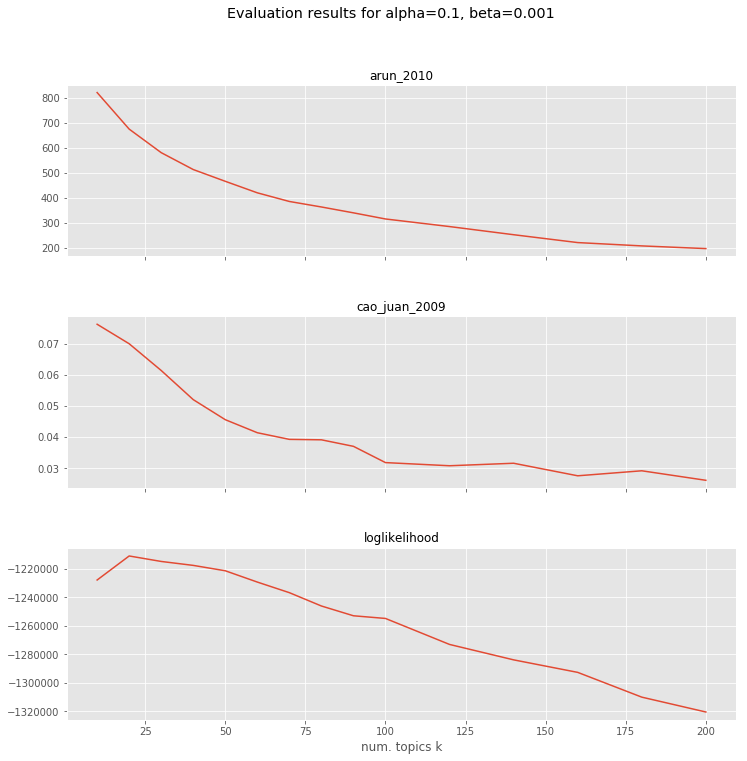

In [28]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

### alpha: 1/k beta: 1/(10*k)

In [29]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 210, 20))
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 40
INFO:lda:n_words: 190550
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_documents: 40214
INFO:lda:n_topics: 10
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 9360
INFO:lda:n_documents: 40214
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_words: 190550
INFO:lda:n_topics: 20
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:vocab_size: 9360
INFO:lda:n_words: 190550
INFO:lda:n_topics: 60
INFO:lda:n_documents: 40214
INFO:lda:n_words: 190550
INFO:lda:n_iter: 2000
IN

INFO:lda:<30> log likelihood: -1237002
INFO:lda:<50> log likelihood: -1239914
INFO:lda:<10> log likelihood: -1389556
INFO:lda:<50> log likelihood: -1215152
INFO:lda:<20> log likelihood: -1277706
INFO:lda:<30> log likelihood: -1238208
INFO:lda:<10> log likelihood: -1402863
INFO:lda:<60> log likelihood: -1234305
INFO:lda:<40> log likelihood: -1218398
INFO:lda:<60> log likelihood: -1210617
INFO:lda:<70> log likelihood: -1229860
INFO:lda:<20> log likelihood: -1278208
INFO:lda:<80> log likelihood: -1226989
INFO:lda:<70> log likelihood: -1207488
INFO:lda:<30> log likelihood: -1239069
INFO:lda:<40> log likelihood: -1218442
INFO:lda:<20> log likelihood: -1280773
INFO:lda:<50> log likelihood: -1208088
INFO:lda:<10> log likelihood: -1408116
INFO:lda:<90> log likelihood: -1224939
INFO:lda:<20> log likelihood: -1280914
INFO:lda:<80> log likelihood: -1204874
INFO:lda:<100> log likelihood: -1223550
INFO:lda:<10> log likelihood: -1415182
INFO:lda:<10> log likelihood: -1401402
INFO:lda:<20> log likeli

INFO:lda:<570> log likelihood: -1208101
INFO:lda:<80> log likelihood: -1178542
INFO:lda:<370> log likelihood: -1190398
INFO:lda:<270> log likelihood: -1182874
INFO:lda:<580> log likelihood: -1207817
INFO:lda:<210> log likelihood: -1172824
INFO:lda:<590> log likelihood: -1207490
INFO:lda:<170> log likelihood: -1171257
INFO:lda:<380> log likelihood: -1190530
INFO:lda:<100> log likelihood: -1171677
INFO:lda:<90> log likelihood: -1176320
INFO:lda:<600> log likelihood: -1208105
INFO:lda:<280> log likelihood: -1182543
INFO:lda:<140> log likelihood: -1169248
INFO:lda:<610> log likelihood: -1207768
INFO:lda:<390> log likelihood: -1190692
INFO:lda:<220> log likelihood: -1171257
INFO:lda:<620> log likelihood: -1207697
INFO:lda:<120> log likelihood: -1168575
INFO:lda:<50> log likelihood: -1201612
INFO:lda:<290> log likelihood: -1182893
INFO:lda:<400> log likelihood: -1190905
INFO:lda:<40> log likelihood: -1223057
INFO:lda:<630> log likelihood: -1207557
INFO:lda:<180> log likelihood: -1170224
INFO

INFO:lda:<1100> log likelihood: -1206770
INFO:lda:<310> log likelihood: -1162029
INFO:lda:<70> log likelihood: -1188272
INFO:lda:<690> log likelihood: -1187086
INFO:lda:<220> log likelihood: -1156640
INFO:lda:<1110> log likelihood: -1206717
INFO:lda:<120> log likelihood: -1161400
INFO:lda:<510> log likelihood: -1177227
INFO:lda:<150> log likelihood: -1154938
INFO:lda:<380> log likelihood: -1166843
INFO:lda:<1120> log likelihood: -1206741
INFO:lda:<700> log likelihood: -1187335
INFO:lda:<260> log likelihood: -1159843
INFO:lda:<1130> log likelihood: -1207310
INFO:lda:<520> log likelihood: -1177621
INFO:lda:<320> log likelihood: -1161765
INFO:lda:<710> log likelihood: -1187815
INFO:lda:<1140> log likelihood: -1207176
INFO:lda:<170> log likelihood: -1157006
INFO:lda:<390> log likelihood: -1167158
INFO:lda:<1150> log likelihood: -1206985
INFO:lda:<720> log likelihood: -1187414
INFO:lda:<190> log likelihood: -1154799
INFO:lda:<530> log likelihood: -1177238
INFO:lda:<230> log likelihood: -115

INFO:lda:<1600> log likelihood: -1205890
INFO:lda:<550> log likelihood: -1163317
INFO:lda:<1610> log likelihood: -1205880
INFO:lda:<1010> log likelihood: -1185770
INFO:lda:<460> log likelihood: -1157616
INFO:lda:<740> log likelihood: -1176663
INFO:lda:<1620> log likelihood: -1206507
INFO:lda:<220> log likelihood: -1146946
INFO:lda:<1630> log likelihood: -1207116
INFO:lda:<1020> log likelihood: -1184957
INFO:lda:<320> log likelihood: -1149788
INFO:lda:<150> log likelihood: -1153982
INFO:lda:<560> log likelihood: -1162669
INFO:lda:<1640> log likelihood: -1206479
INFO:lda:<250> log likelihood: -1148198
INFO:lda:<750> log likelihood: -1176509
INFO:lda:<380> log likelihood: -1155315
INFO:lda:<1030> log likelihood: -1185557
INFO:lda:<270> log likelihood: -1148380
INFO:lda:<1650> log likelihood: -1206564
INFO:lda:<470> log likelihood: -1157821
INFO:lda:<1660> log likelihood: -1206257
INFO:lda:<1040> log likelihood: -1185851
INFO:lda:<570> log likelihood: -1163022
INFO:lda:<760> log likelihood

INFO:lda:<730> log likelihood: -1161331
INFO:lda:<420> log likelihood: -1147216
INFO:lda:<360> log likelihood: -1144251
INFO:lda:<290> log likelihood: -1140594
INFO:lda:<1340> log likelihood: -1184550
INFO:lda:<980> log likelihood: -1175144
INFO:lda:<610> log likelihood: -1156865
INFO:lda:<500> log likelihood: -1150921
INFO:lda:<740> log likelihood: -1161497
INFO:lda:<1350> log likelihood: -1184335
INFO:lda:<990> log likelihood: -1174478
INFO:lda:<150> log likelihood: -1150102
INFO:lda:<1360> log likelihood: -1184160
INFO:lda:<200> log likelihood: -1144449
INFO:lda:<620> log likelihood: -1155555
INFO:lda:<430> log likelihood: -1147177
INFO:lda:<330> log likelihood: -1143423
INFO:lda:<750> log likelihood: -1161619
INFO:lda:<1000> log likelihood: -1174895
INFO:lda:<1370> log likelihood: -1184666
INFO:lda:<170> log likelihood: -1150980
INFO:lda:<510> log likelihood: -1150447
INFO:lda:<370> log likelihood: -1144369
INFO:lda:<1380> log likelihood: -1184387
INFO:lda:<240> log likelihood: -11

INFO:lda:<650> log likelihood: -1148987
INFO:lda:<790> log likelihood: -1154169
INFO:lda:<380> log likelihood: -1137387
INFO:lda:<260> log likelihood: -1137972
INFO:lda:<1770> log likelihood: -1182364
INFO:lda:<970> log likelihood: -1160300
INFO:lda:<1290> log likelihood: -1173724
INFO:lda:<1780> log likelihood: -1182591
INFO:lda:<310> log likelihood: -1138813
INFO:lda:<560> log likelihood: -1143778
INFO:lda:<480> log likelihood: -1141137
INFO:lda:<800> log likelihood: -1153955
INFO:lda:<200> log likelihood: -1140067
INFO:lda:<980> log likelihood: -1160194
INFO:lda:<1790> log likelihood: -1182027
INFO:lda:<1300> log likelihood: -1172687
INFO:lda:<660> log likelihood: -1148585
INFO:lda:<1800> log likelihood: -1181900
INFO:lda:<430> log likelihood: -1139156
INFO:lda:<1310> log likelihood: -1172853
INFO:lda:<990> log likelihood: -1160308
INFO:lda:<1810> log likelihood: -1182258
INFO:lda:<810> log likelihood: -1153390
INFO:lda:<180> log likelihood: -1145827
INFO:lda:<570> log likelihood: -

INFO:lda:<1630> log likelihood: -1172565
INFO:lda:<1220> log likelihood: -1158912
INFO:lda:<600> log likelihood: -1139795
INFO:lda:<820> log likelihood: -1148206
INFO:lda:<220> log likelihood: -1139457
INFO:lda:<250> log likelihood: -1135320
INFO:lda:<530> log likelihood: -1137360
INFO:lda:<1640> log likelihood: -1171854
INFO:lda:<390> log likelihood: -1135219
INFO:lda:<1000> log likelihood: -1152866
INFO:lda:<710> log likelihood: -1142217
INFO:lda:<1230> log likelihood: -1158988
INFO:lda:<1650> log likelihood: -1172613
INFO:lda:<480> log likelihood: -1134766
INFO:lda:<330> log likelihood: -1131892
INFO:lda:<830> log likelihood: -1148050
INFO:lda:<1660> log likelihood: -1172681
INFO:lda:<1240> log likelihood: -1158682
INFO:lda:<1010> log likelihood: -1152551
INFO:lda:<610> log likelihood: -1139992
INFO:lda:<1670> log likelihood: -1172091
INFO:lda:<720> log likelihood: -1142981
INFO:lda:<540> log likelihood: -1136415
INFO:lda:<1250> log likelihood: -1159121
INFO:lda:<1680> log likelihoo

INFO:lda:<650> log likelihood: -1134857
INFO:lda:<870> log likelihood: -1139786
INFO:lda:<1510> log likelihood: -1157928
INFO:lda:<740> log likelihood: -1138375
INFO:lda:<400> log likelihood: -1129121
INFO:lda:<480> log likelihood: -1133325
INFO:lda:<270> log likelihood: -1132544
INFO:lda:<1240> log likelihood: -1152100
INFO:lda:<1020> log likelihood: -1146398
INFO:lda:<1520> log likelihood: -1158207
INFO:lda:<1250> log likelihood: -1151440
INFO:lda:<880> log likelihood: -1139678
INFO:lda:<310> log likelihood: -1130357
INFO:lda:<590> log likelihood: -1132012
INFO:lda:<1530> log likelihood: -1158420
INFO:lda:<750> log likelihood: -1138332
INFO:lda:<1030> log likelihood: -1146570
INFO:lda:<660> log likelihood: -1134983
INFO:lda:<350> log likelihood: -1134923
INFO:lda:<1260> log likelihood: -1151384
INFO:lda:<1540> log likelihood: -1158257
INFO:lda:<490> log likelihood: -1132799
INFO:lda:<890> log likelihood: -1139478
INFO:lda:<1040> log likelihood: -1146933
INFO:lda:<1550> log likelihood

INFO:lda:<1530> log likelihood: -1150519
INFO:lda:<1880> log likelihood: -1157000
INFO:lda:<810> log likelihood: -1133099
INFO:lda:<1260> log likelihood: -1145740
INFO:lda:<920> log likelihood: -1136269
INFO:lda:<380> log likelihood: -1125809
INFO:lda:<430> log likelihood: -1131232
INFO:lda:<1080> log likelihood: -1139479
INFO:lda:<1540> log likelihood: -1150763
INFO:lda:<1890> log likelihood: -1157667
INFO:lda:<730> log likelihood: -1129976
INFO:lda:<500> log likelihood: -1125053
INFO:lda:<1270> log likelihood: -1145626
INFO:lda:<600> log likelihood: -1130519
INFO:lda:<1900> log likelihood: -1156886
INFO:lda:<1550> log likelihood: -1150979
INFO:lda:<930> log likelihood: -1136672
INFO:lda:<820> log likelihood: -1132843
INFO:lda:<1090> log likelihood: -1139026
INFO:lda:<1910> log likelihood: -1158020
INFO:lda:<1280> log likelihood: -1144639
INFO:lda:<340> log likelihood: -1125511
INFO:lda:<1560> log likelihood: -1150640
INFO:lda:<740> log likelihood: -1130222
INFO:lda:<1920> log likelih

INFO:lda:<520> log likelihood: -1127923
INFO:lda:<720> log likelihood: -1127347
INFO:lda:<600> log likelihood: -1123429
INFO:lda:<1860> log likelihood: -1149584
INFO:lda:<1530> log likelihood: -1144848
INFO:lda:<1120> log likelihood: -1136068
INFO:lda:<1310> log likelihood: -1137881
INFO:lda:<1870> log likelihood: -1150002
INFO:lda:<990> log likelihood: -1132002
INFO:lda:<890> log likelihood: -1127738
INFO:lda:<1540> log likelihood: -1144681
INFO:lda:<410> log likelihood: -1121773
INFO:lda:<1130> log likelihood: -1135701
INFO:lda:<1880> log likelihood: -1149164
INFO:lda:<730> log likelihood: -1126357
INFO:lda:<1320> log likelihood: -1137762
INFO:lda:<610> log likelihood: -1123011
INFO:lda:<1550> log likelihood: -1144483
INFO:lda:<530> log likelihood: -1128089
INFO:lda:<1000> log likelihood: -1132563
INFO:lda:<1890> log likelihood: -1149657
INFO:lda:<470> log likelihood: -1122176
INFO:lda:<900> log likelihood: -1128409
INFO:lda:<1140> log likelihood: -1135570
INFO:lda:<1330> log likelih

INFO:lda:<560> log likelihood: -1120072
INFO:lda:<1850> log likelihood: -1143624
INFO:lda:<1070> log likelihood: -1127398
INFO:lda:<1580> log likelihood: -1137111
INFO:lda:<1360> log likelihood: -1134382
INFO:lda:<1200> log likelihood: -1130035
INFO:lda:<1860> log likelihood: -1143483
INFO:lda:<880> log likelihood: -1125326
INFO:lda:<640> log likelihood: -1125141
INFO:lda:<1590> log likelihood: -1137072
INFO:lda:<500> log likelihood: -1117124
INFO:lda:<1870> log likelihood: -1143553
INFO:lda:<1080> log likelihood: -1126997
INFO:lda:<1370> log likelihood: -1135117
INFO:lda:<740> log likelihood: -1119830
INFO:lda:<1210> log likelihood: -1130538
INFO:lda:<1600> log likelihood: -1136975
INFO:lda:<1880> log likelihood: -1143063
INFO:lda:<570> log likelihood: -1119164
INFO:lda:<890> log likelihood: -1124886
INFO:lda:<1380> log likelihood: -1134211
INFO:lda:<1090> log likelihood: -1126455
INFO:lda:<1890> log likelihood: -1142949
INFO:lda:<1220> log likelihood: -1130319
INFO:lda:<1610> log lik

INFO:lda:<770> log likelihood: -1122964
INFO:lda:<890> log likelihood: -1117917
INFO:lda:<1450> log likelihood: -1130091
INFO:lda:<600> log likelihood: -1113993
INFO:lda:<1300> log likelihood: -1125271
INFO:lda:<1650> log likelihood: -1134472
INFO:lda:<1910> log likelihood: -1136467
INFO:lda:<1070> log likelihood: -1123740
INFO:lda:<1460> log likelihood: -1130261
INFO:lda:<1920> log likelihood: -1136843
INFO:lda:<1660> log likelihood: -1134027
INFO:lda:<690> log likelihood: -1115819
INFO:lda:<1310> log likelihood: -1125845
INFO:lda:<900> log likelihood: -1118652
INFO:lda:<780> log likelihood: -1122763
INFO:lda:<1930> log likelihood: -1136257
INFO:lda:<1080> log likelihood: -1123169
INFO:lda:<1470> log likelihood: -1129964
INFO:lda:<1670> log likelihood: -1134056
INFO:lda:<1320> log likelihood: -1125207
INFO:lda:<1940> log likelihood: -1136432
INFO:lda:<910> log likelihood: -1117952
INFO:lda:<610> log likelihood: -1114477
INFO:lda:<1680> log likelihood: -1133015
INFO:lda:<1480> log like

INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1131666.745432
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.063055
INFO:lda:<1580> log likelihood: -1123973
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 409.775023
INFO:lda:<1090> log likelihood: -1117333
INFO:lda:<1770> log likelihood: -1129942
INFO:lda:<1300> log likelihood: -1123177
INFO:lda:<950> log likelihood: -1120139
INFO:lda:<1590> log likelihood: -1123612
INFO:lda:<740> log likelihood: -1112030
INFO:lda:<840> log likelihood: -1113850
INFO:lda:<1780> log likelihood: -1128415
INFO:lda:<1310> log likelihood: -1122727
INFO:lda:<1100> log likelihood: -1116887
INFO:lda:<1600> log likelihood: -1123211
INFO:lda:<1790> log likelihood: -1128659
INFO:lda:<960> log likelihood: -1120232
INFO:lda:<1320> log likelihood: -1122717
INFO:lda:<850> log likelihood: -1113443
INFO:lda:<1800> log likelihood: -1128625
INFO:lda:<1610> log likelihood: -1123705
INFO:lda:<750> log likelihood: -1110849
INF

INFO:lda:<1050> log likelihood: -1111946
INFO:lda:<930> log likelihood: -1109319
INFO:lda:<1980> log likelihood: -1121987
INFO:lda:<1630> log likelihood: -1122068
INFO:lda:<1370> log likelihood: -1115455
INFO:lda:<1200> log likelihood: -1117572
INFO:lda:<1060> log likelihood: -1110769
INFO:lda:<1990> log likelihood: -1121643
INFO:lda:<940> log likelihood: -1109059
INFO:lda:<1640> log likelihood: -1121249
INFO:lda:<1380> log likelihood: -1114794
INFO:lda:<1999> log likelihood: -1120551
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1121642.528717
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.056708
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 362.071193
INFO:lda:<1210> log likelihood: -1117759
INFO:lda:<1650> log likelihood: -1122371
INFO:lda:<1070> log likelihood: -1111396
INFO:lda:<1390> log likelihood: -1115971
INFO:lda:<950> log likelihood: -1109056
INFO:lda:<1660> log likelihood: -1121432
INFO:lda:<1220> log likelihood: -1116987


INFO:lda:<1580> log likelihood: -1116023
INFO:lda:<1400> log likelihood: -1108729
INFO:lda:<1810> log likelihood: -1113867
INFO:lda:<1590> log likelihood: -1115159
INFO:lda:<1250> log likelihood: -1106831
INFO:lda:<1820> log likelihood: -1113614
INFO:lda:<1410> log likelihood: -1108454
INFO:lda:<1600> log likelihood: -1115158
INFO:lda:<1260> log likelihood: -1107427
INFO:lda:<1830> log likelihood: -1114650
INFO:lda:<1420> log likelihood: -1108764
INFO:lda:<1610> log likelihood: -1115635
INFO:lda:<1840> log likelihood: -1114280
INFO:lda:<1270> log likelihood: -1106726
INFO:lda:<1430> log likelihood: -1108965
INFO:lda:<1620> log likelihood: -1115554
INFO:lda:<1850> log likelihood: -1113784
INFO:lda:<1280> log likelihood: -1106707
INFO:lda:<1630> log likelihood: -1115916
INFO:lda:<1440> log likelihood: -1107822
INFO:lda:<1860> log likelihood: -1114221
INFO:lda:<1640> log likelihood: -1115291
INFO:lda:<1870> log likelihood: -1114090
INFO:lda:<1450> log likelihood: -1108550
INFO:lda:<1290> 

INFO:lda:<1850> log likelihood: -1104105
INFO:lda:<1860> log likelihood: -1103759
INFO:lda:<1870> log likelihood: -1104410
INFO:lda:<1880> log likelihood: -1103873
INFO:lda:<1890> log likelihood: -1103560
INFO:lda:<1900> log likelihood: -1103278
INFO:lda:<1910> log likelihood: -1104137
INFO:lda:<1920> log likelihood: -1104064
INFO:lda:<1930> log likelihood: -1104091
INFO:lda:<1940> log likelihood: -1105043
INFO:lda:<1950> log likelihood: -1103813
INFO:lda:<1960> log likelihood: -1104619
INFO:lda:<1970> log likelihood: -1104161
INFO:lda:<1980> log likelihood: -1104103
INFO:lda:<1990> log likelihood: -1104086
INFO:lda:<1999> log likelihood: -1103665
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -1104085.913101
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.045295
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 252.611154


plotting evaluation results


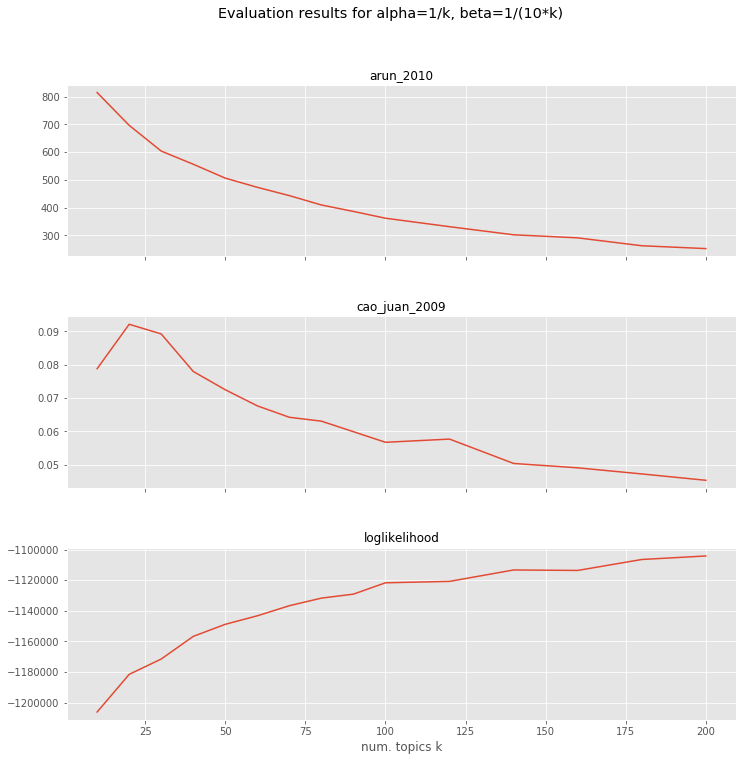

In [30]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

## Runing LDA
### topics: 60 / alpha: 1/k / beta: 0.1

In [34]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix, num_topics=60, 
                                id2word = dictionary, passes=50, workers=16, 
                                alpha=1/60, eta=0.1)

In [35]:
a =(ldamodel.print_topics(num_topics=60, num_words=5))
for x in a:
    print(x)

(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')
(1, '0.019*"nascem" + 0.017*"bebes" + 0.013*"dois" + 0.011*"suspeita" + 0.010*"mosquitos"')
(2, '0.018*"pouco" + 0.018*"recebem" + 0.014*"kkkkk" + 0.014*"bebês" + 0.012*"óculos"')
(3, '0.019*"maioria" + 0.018*"política" + 0.014*"brasileiros" + 0.013*"vacinas" + 0.013*"crise"')
(4, '0.037*"primeira" + 0.015*"brasileira" + 0.014*"modelo" + 0.013*"mundo" + 0.009*"pode"')
(5, '0.135*"caso" + 0.092*"zika" + 0.061*"primeiro" + 0.024*"bebê" + 0.022*"vírus"')
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')
(7, '0.026*"gente" + 0.015*"nascidos" + 0.015*"recém" + 0.015*"dessa" + 0.014*"piada"')
(8, '0.061*"acho" + 0.035*"cérebro" + 0.023*"problema" + 0.015*"ainda" + 0.013*"pode"')
(9, '0.021*"acha" + 0.009*"doença" + 0.009*"pessoal" + 0.008*"agora" + 0.007*"atendimentos"')
(10, '0.036*"mutirão" + 0.027*"crianças" + 0.021*"hospital" + 0.019*"parecendo" + 0.010*"difi

In [36]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 21):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.109*"aborto" + 0.025*"caso" + 0.024*"contra" + 0.018*"favor" + 0.017*"sobre"')

meu isso de microcefalia me dá uma dor


"SOCORRO!!! Zika, microcefalia, dengue, inflação, desemprego, desajuste fiscal, juros altos, alta de impostos,... https://t.co/kkYwU14HH9


https://t.co/T2Oh55tpYj   Vacina contra a Gripe Suína é a Verdadeira Causadora da        Microcefalia. Cuidado com as Vacinas. Veja Vídeo


https://t.co/eY3CmtYxXG Algo me diz que esse pedido do MPF/MG tem a ver com o surto de microcefalia. Só acho.


Mais dois mitos sobre zika e microcefalia: vacina HPV e haitianos: https://t.co/KO0b4OATnz #twitciencia


Vocês preferem ver uma criança sofrer e padecer de dor do que legalizar o aborto em casos como esse de microcefalia?


@Denise_apm @ClubeAntiPT 
No caso dessa vacinação nas gestantes, não significa que 100% das vacinadas terão feto com microcefalia.


@senhoritaelza https://t.co/7uAsZpvNyh tem outros sites tbm, jogando 'microcefalia vacina rubeola' no gugou temo

Mais de 3k de grávidas na Colômbia diagnosticadas com zika vírus: nenhum bebê com microcefalia. 

E o medo de tomar as vacina?




-----------


topico: 6
(6, '0.030*"alerta" + 0.019*"especialista" + 0.017*"grávida" + 0.017*"zika" + 0.012*"brasil"')

#Zika #Microcefalia OMS alerta: é mais seguro não engravidar.https://t.co/82ko6Lb7SX #SaúdePública #Dengue #Epidemia https://t.co/8lEo5VXdkK


Município de São Bento em alerta contra Zica, Dengue e Microcefalia https://t.co/AJbrxpiHno https://t.co/XOSFbSuk6U


@Nubobot42 microcefalia quando nenhuma grávida toma vacina contra rubéola durante a gravidez)


@jornalnacional Enquanto tratam de dengue e microcefalia, os comunistas das FFAA estão ganhando terreno e angariando a simpatia do Militares


SUS ABANDONADO E ROUBADO PELO @ptbrasil
#TEMPORÃO
#HUMBERTOCOSTA
#PADILHA
A DENGUE EXPLODIU!
VEIO O #ZIKA A #MICROCEFALIAdoPT  #OsFILHOSdoPT


@folha Nunca vi uma Mãe infectada com Dengue gerar uma criança com problemas mais graves que uma Microcefa

UMA PERGUNTINHA @_mariadorosario  

EM QUE GOVERNO MESMO OS CASOS DE DENGUE E MICROCEFALIA AUMENTARAM?

 https://t.co/PALczHe4Pb




-----------


topico: 12
(12, '0.025*"tema" + 0.014*"tava" + 0.013*"fico" + 0.010*"redação" + 0.008*"estadual"')

perdi um irmão vítima de microcefalia, não consigo imaginar a dor dos meus pais em ver essa reportagem do Fantástico :'(


AO VIVO: Secretário do @minsaude fala dos três eixos ao combate à #dengue e #microcefalia https://t.co/SHC5BZJ3Oi


Microcefalia assusta mais que câncer e aids, reconhece secretário estadual da Saúde
@samuelvettori @RdGuaibaOficial


@WillianMar ppr isso q eu so pego gente com microcefalia


Lara estevos parabéns você é a microcefalia


Campanha da Fraternidade 2016, esse é o tema do #CaminhoscomPeJuarez , ás 22h, tudo sobre a  polêmica do aborto  com ref. a microcefalia.


R7 Mãe de gêmeos em que um tem microcefalia diz: "Tem dia que fico pensando por que um teve e outro não" R7 Lucas e… https://t.co/cOWb3t9AWC


508 caso

@VEJA Justo no momento que o Brasil está enfrentando uma epidemia de dengue, zika vírus e microcefalia? Alô MPF, tomem providências!


@samantapersotti @ro_vanja @JorgeXiada O Dr. Plínio diz que casos de microcefalia correspondem com vacinação de grávidas e mulheres férteis.


Rotas de entrada do ... - https://t.co/pCfyU5IAao  #biologia #zika #nomeiodaterra #dengue #microcefalia #olimpiadas https://t.co/xgc6RbSepe


Alguém já leu isso? Microcefalia devido a vírus da copa 2014 ou vacina da copa 2014?... https://t.co/obRBNQ5VPe


#OMS prevê testes de #vacina #antizika no mínimo em 18 meses https://t.co/qRpntpe9Bz #mosquito #Aedesaegypti #doença #saúde #microcefalia




-----------


topico: 18
(18, '0.096*"filho" + 0.023*"ajuda" + 0.017*"abortar" + 0.016*"cuidar" + 0.015*"criança"')

@Aetano foda! Aids, microcefalia, inflação alta...


Tava vendo bem estar e as criancas com microcefalia, meu é muito triste ver um bebê assim, já é ruim ver criança com gripe imagina


Tô com medo de pesqui